# MSDS 422 Assignment 2 - Evaluating Regression Models:

Compete in the House Prices:  Advanced Regression Techniques competition here:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques.  You must establish an account with Kaggle.com (free). 

Use many explanatory variables for your predictions. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. Evaluate these methods within a cross-validation design using the root mean-squared error (RMSE) as an index of prediction error.  Submit your models to Kaggle.com for evaluation on the test set.  Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### Programming Resources
A detailed example shows how to evaluate alternative regressors within a cross-validation design:  That is example is entitled "Regression Examples: Predicting Sales" under Technology Resources.

#### Grading Guidelines (50 points)
- Data preparation, exploration, visualization (10 points)
- Review research design and modeling methods (10 points)
- Review results, evaluate models (10 points)
- Implementation and programming  as evidenced by Kaggle submission (10 points)
- Exposition, problem description, and management recommendations (10 points)

### Table of Contents
- Data preparation, exploration, visualization (10 points)

## Data preparation, exploration, visualization (10 points)

Import Libraries

In [346]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn
import math

from IPython.display import display
from IPython.display import HTML

def clear_plot():
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window

In [347]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')

In [348]:
train_set.shape

(1460, 81)

In [349]:
test_set.shape

(1459, 80)

In [350]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [351]:
train_set.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [352]:
train_set.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [353]:
train_set.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

Convert date fields to datetime to allow for easy sorting later if needed

In [354]:
train_set['YearBuilt'] = pd.to_datetime(train_set['YearBuilt'], format='%Y')
train_set['YearRemodAdd'] = pd.to_datetime(train_set['YearRemodAdd'], format='%Y')
# create a new column combining month and year
def fixdate(m,y):
    return pd.to_datetime(str(y) + "/" + str(m))
train_set['SaleDate'] = train_set.apply(lambda x: fixdate(x.MoSold, x.YrSold), axis=1)

Inspect missing values

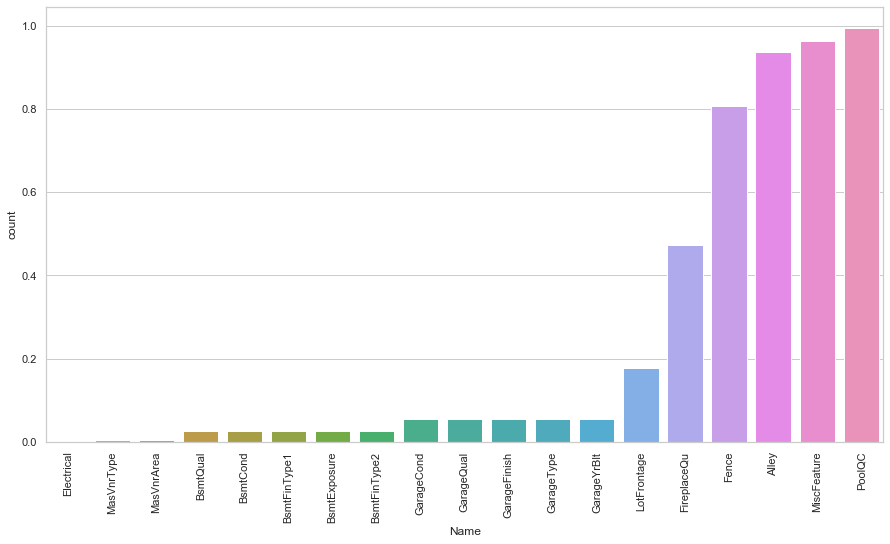

In [355]:
# get percent of missing values
missing_values = train_set.isnull().sum() / len(train_set)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# convert to DataFrame
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

# plot graph
plt.subplots(figsize=(15,8))
sns.set(style='whitegrid', color_codes = True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

For now I am going to leave the missing data fields as is

### Get insights on what are good predictors of SalePrice where we have numerical features

### Exploration 1: Which features have perform well as predictors of SalePrice?

This section will look at all features and plot a scatter, boxplot, or both to determine if they are good predictors of SalePrice. If there are to many categories to plot a table containing mean and median will be used instead

First let's define a dictionary that contains each feature and what graph to create:
- both: creates a scatter and boxplot
- scatter: creates a scatter plot
- boxplot: creates a boxplot
- mean-median: determines the mean, median, min, and max

In [433]:
cols_to_inspect = {
    'MSSubClass': 'boxplot', # Identifies the type of dwelling involved in the sale
    'MSZoning': 'boxplot', # Identifies the general zoning classification of the sale.
    'LotFrontage': 'scatter', # Linear feet of street connected to property
    'LotArea': 'scatter', # Lot size in square feet
    'Street': 'boxplot', # Type of road access to property
    'Alley': 'boxplot', # Type of alley access to property
    'LotShape': 'boxplot', # General shape of property
    'LandContour': 'boxplot', # Flatness of the property
    'Utilities': 'boxplot', # Type of utilities available
    'LotConfig': 'boxplot', # Lot configuration
    'LandSlope': 'boxplot', # Slope of property
    'Neighborhood': 'mean-median', # Physical locations within Ames city limits
    'Condition1': 'boxplot', # Proximity to various conditions
    'Condition2': 'boxplot', # Proximity to various conditions (if more than one is present)
    'BldgType': 'boxpot', # Type of dwelling
    'HouseStyle': 'boxplot', # Style of dwelling
    'OverallQual': 'both', # Rates the overall material and finish of the house
    'OverallCond': 'both', # Rates the overall condition of the house
    'YearBuilt': 'scatter', # Original construction date   ---- year
    'YearRemodAdd': 'scatter', # Remodel date (same as construction date if no remodeling or additions)  ---- year
    'RoofStyle': 'boxplot', # Type of roof
    'RoofMatl': 'boxplot', # Roof material
    'Exterior1st': 'mean-median', # Exterior covering on house
    'Exterior2nd': 'mean-median', # Exterior covering on house (if more than one material)
    'MasVnrType': 'boxplot', # Masonry veneer typ
    'MasVnrArea': 'scatter', # Masonry veneer area in square feet
    'ExterQual': 'boxplot', # Evaluates the quality of the material on the exterior 
    'ExterCond': 'boxplot', # Evaluates the present condition of the material on the exterior
    'Foundation': 'boxplot', # Type of foundation
    'BsmtQual': 'boxplot', # Evaluates the height of the basement
    'BsmtCond': 'boxplot', # Evaluates the general condition of the basement
    'BsmtExposure': 'boxplot', # efers to walkout or garden level walls
    'BsmtFinType1': 'boxplot', # Rating of basement finished area
    'BsmtFinSF1': 'scatter', # Type 1 finished square feet
    'BsmtFinType2': 'boxplot', # Rating of basement finished area (if multiple types)
    'BsmtFinSF2': 'scatter', # Type 2 finished square feet
    'BsmtUnfSF': 'scatter', # Unfinished square feet of basement area
    'TotalBsmtSF': 'scatter', # Total square feet of basement area
    'Heating': 'boxplot', # Type of heating
    'HeatingQC': 'boxplot', # Heating quality and condition
    'CentralAir': 'boxplot', # Central air conditioning
    'Electrical': 'boxplot', # Electrical system
    '1stFlrSF': 'scatter', # First floor square feet
    '2ndFlrSF': 'scatter', # Second floor square feet
    'LowQualFinSF': 'scatter', # Low quality finished square feet (all floors)
    'GrLivArea': 'scatter', # Above grade (ground) living area square feet
    'BsmtFullBath': 'both', # Basement full bathrooms
    'BsmtHalfBath': 'both', # Basement half bathrooms
    'FullBath': 'both', # Full bathrooms above grade
    'HalfBath': 'both', # Half baths above grade
    'BedroomAbvGr': 'both', #  Bedrooms above grade (does NOT include basement bedrooms)
    'KitchenAbvGr': 'both', # Kitchens above grade
    'KitchenQual': 'boxplot', # Kitchen quality
    'TotRmsAbvGrd': 'both', # Total rooms above grade (does not include bathrooms)
    'Functional': 'boxplot', # Home functionality (Assume typical unless deductions are warranted)
    'Fireplaces': 'both', #
    'FireplaceQu': 'boxplot', # Fireplace quality
    'GarageType': 'boxplot', # Garage location
    'GarageYrBlt': 'scatter', # Year garage was built ---- year
    'GarageFinish': 'boxplot', # Interior finish of the garage
    'GarageCars': 'both', # Size of garage in car capacity
    'GarageArea': 'scatter', # Size of garage in square feet
    'GarageQual': 'boxplot', # Garage quality
    'GarageCond': 'boxplot', # Garage condition
    'PavedDrive': 'boxplot', # Paved driveway
    'WoodDeckSF': 'scatter', # Wood deck area in square feet
    'OpenPorchSF': 'scatter', # Open porch area in square feet
    'EnclosedPorch': 'scatter', # Enclosed porch area in square feet
    '3SsnPorch': 'scatter', # Three season porch area in square feet
    'ScreenPorch': 'scatter', # Screen porch area in square feet
    'PoolArea': 'scatter', # Pool area in square feet
    'PoolQC': 'boxplot', # Pool quality
    'Fence': 'boxplot', # Fence quality
    'MiscFeature': 'boxplot', # Miscellaneous feature not covered in other categories
    'MiscVal': 'scatter', # $Value of miscellaneous feature
    #'MoSold': 'scatter', # Month Sold (MM)  ---- year
    #'YrSold': 'scatter', # Year Sold (YYYY)  ---- year
    'SaleDate': 'scatter', # combined column of MoSold and YrSold as a DateTime
    'SaleType': 'boxplot', # Type of sale
    'SaleCondition': 'boxplot' # Condition of sale
}
cols_to_inspect = dict(sorted(cols_to_inspect.items(), key=lambda x: x[0]) )

#### Both Scatter and Boxplots

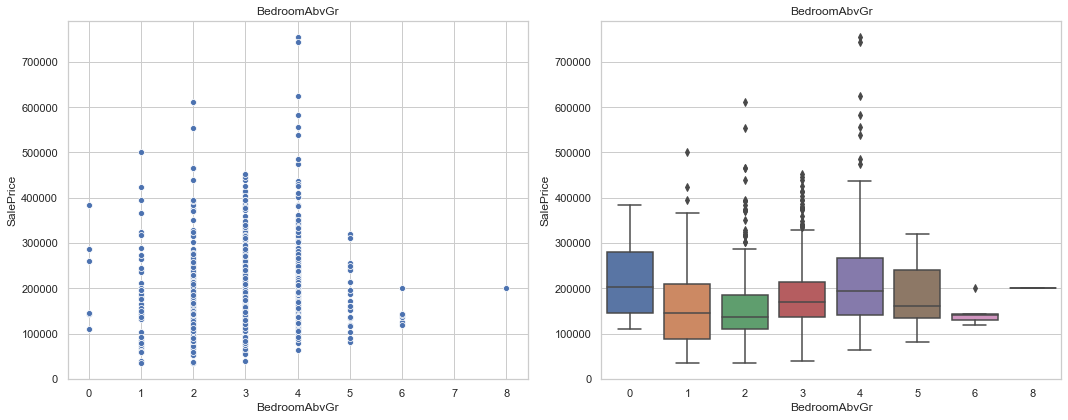

None

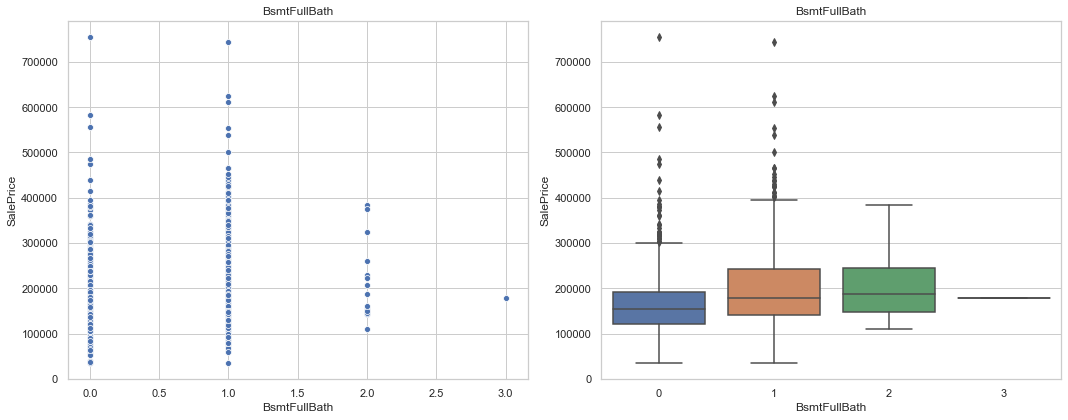

None

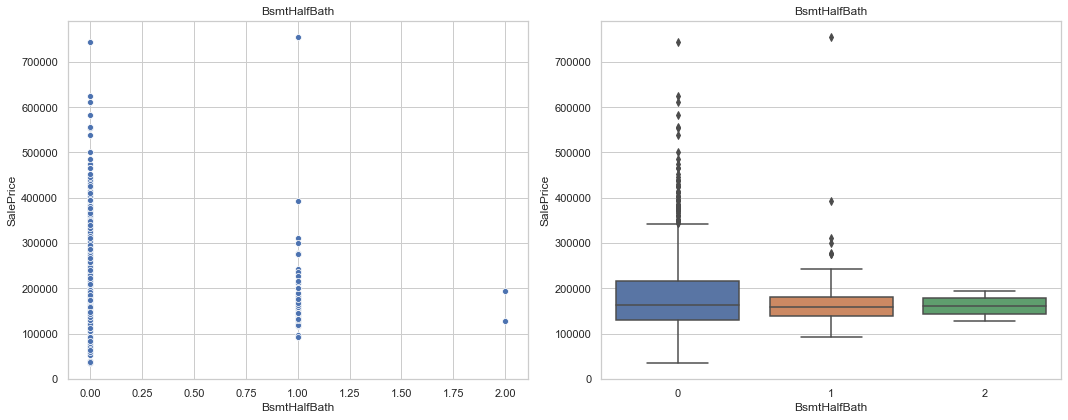

None

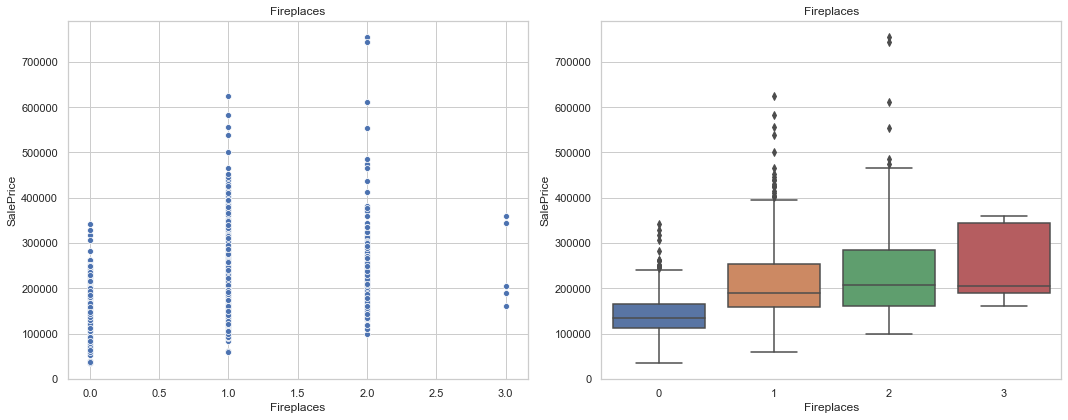

None

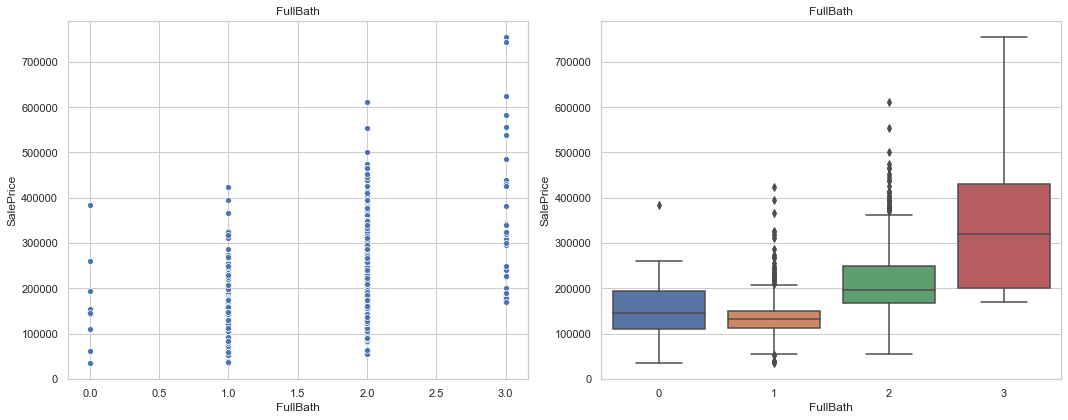

None

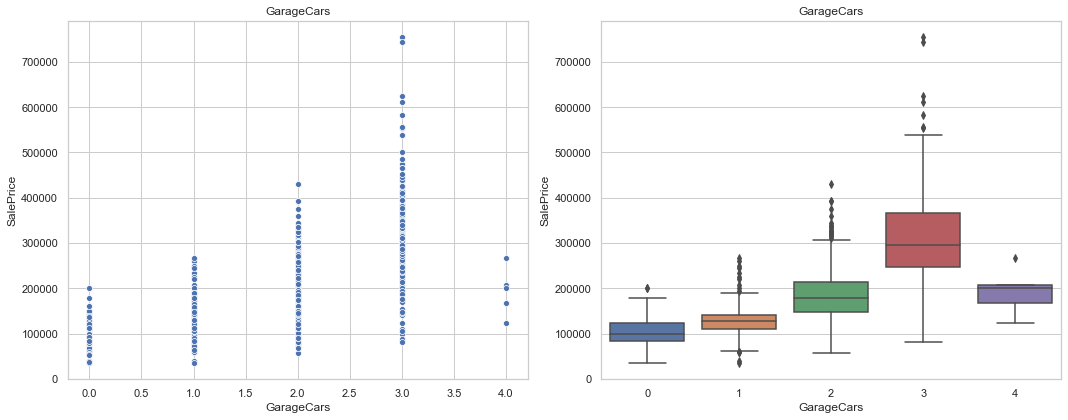

None

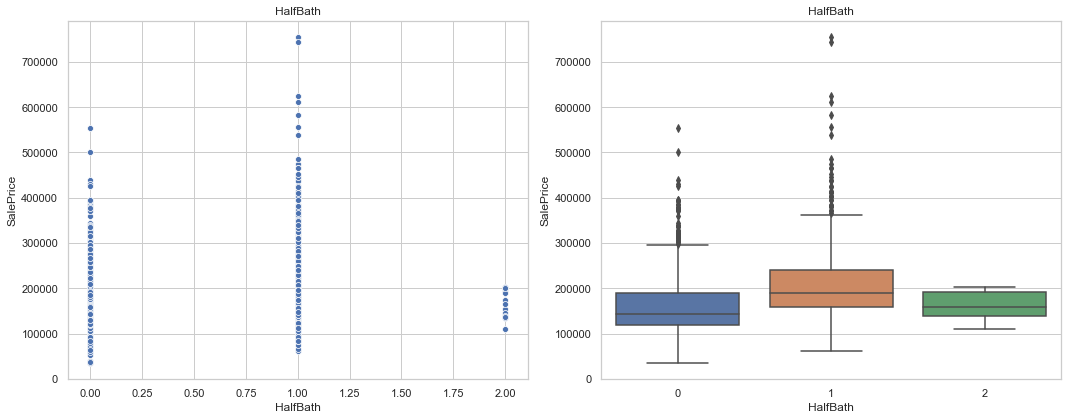

None

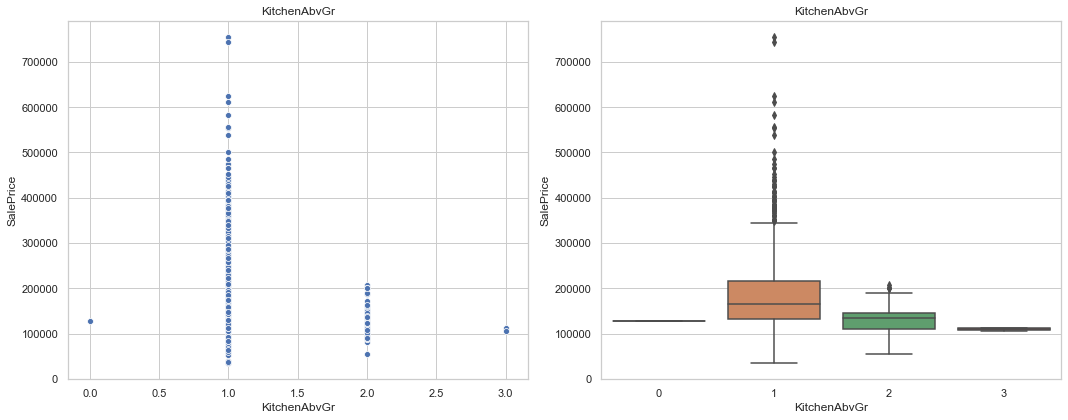

None

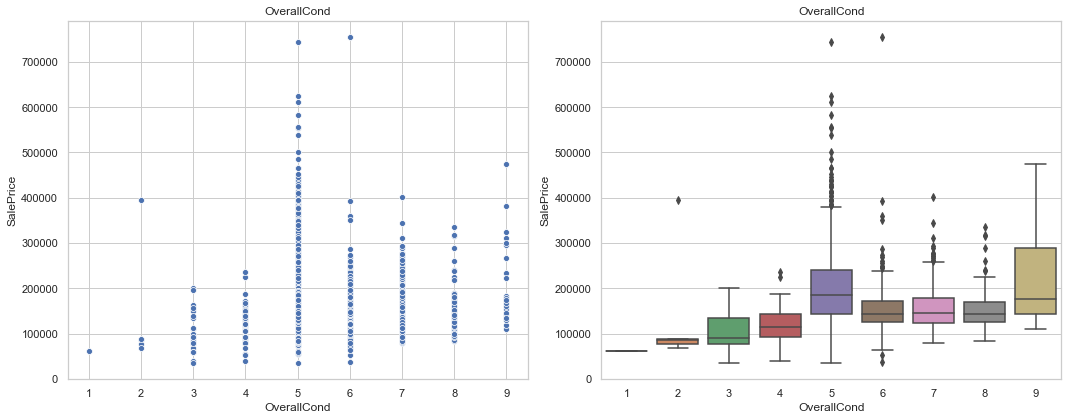

None

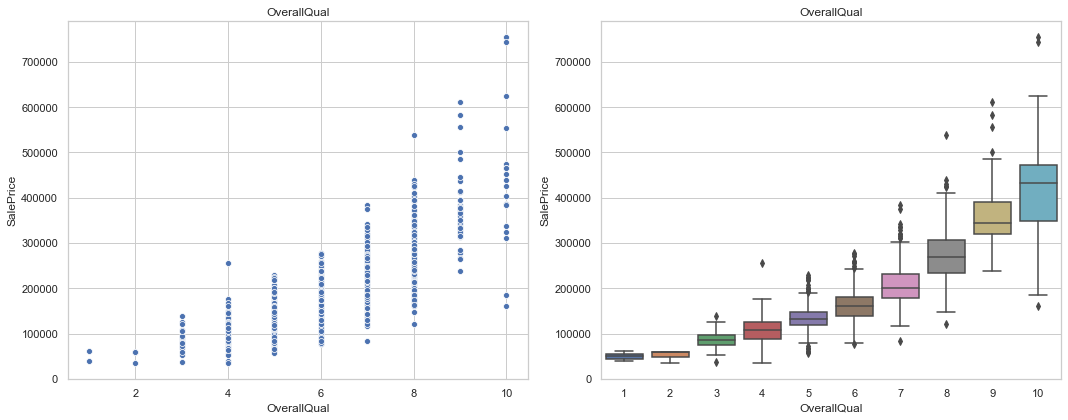

None

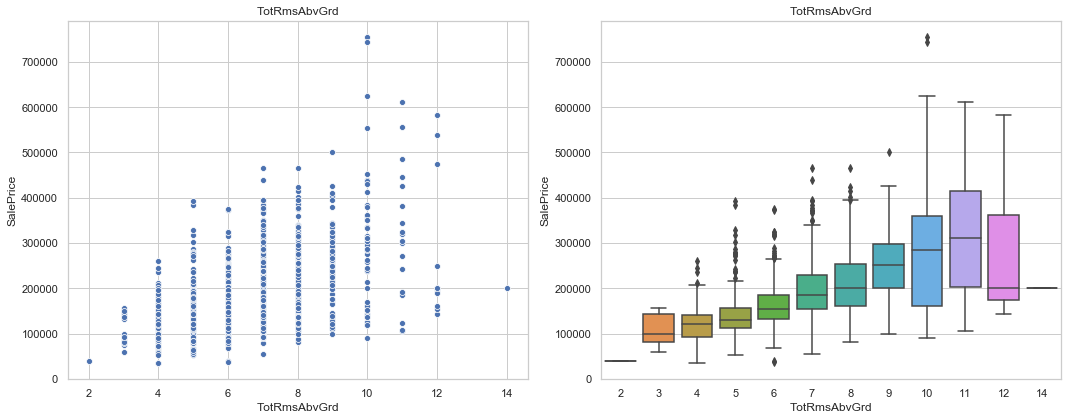

None

In [434]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'both']:
    clear_plot()
    
    fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
    sns.scatterplot(x=feature, y='SalePrice', data=train_set, ax=axarr[0]).set(title=feature)
    sns.boxplot(x=feature, y='SalePrice', data=train_set, ax=axarr[1]).set(title=feature)
    
    fig.tight_layout()
    display(plt.show())

#### Scatter Plots

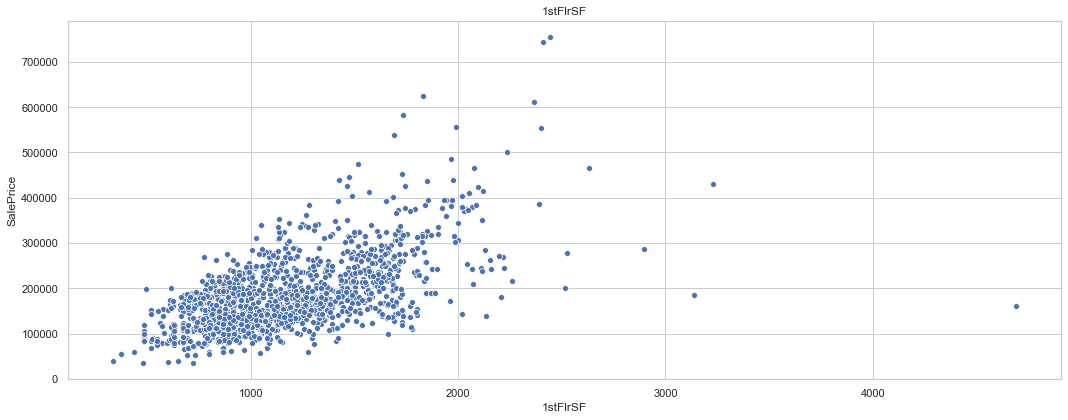

None

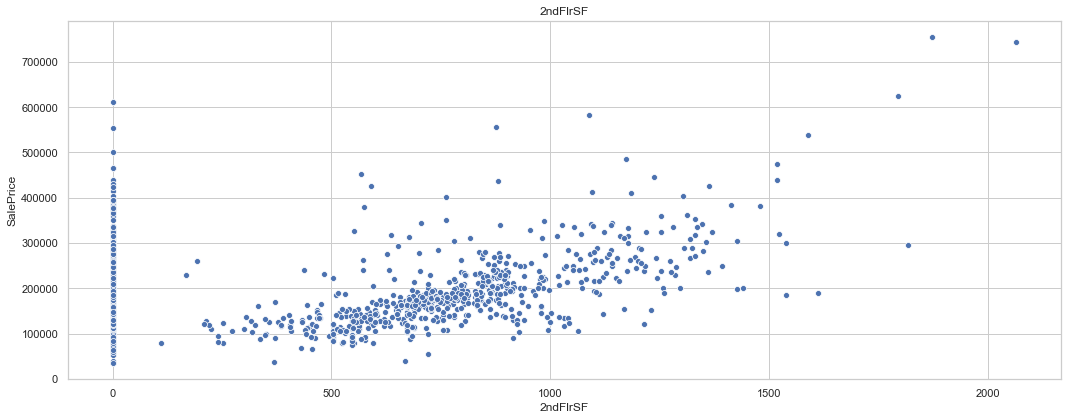

None

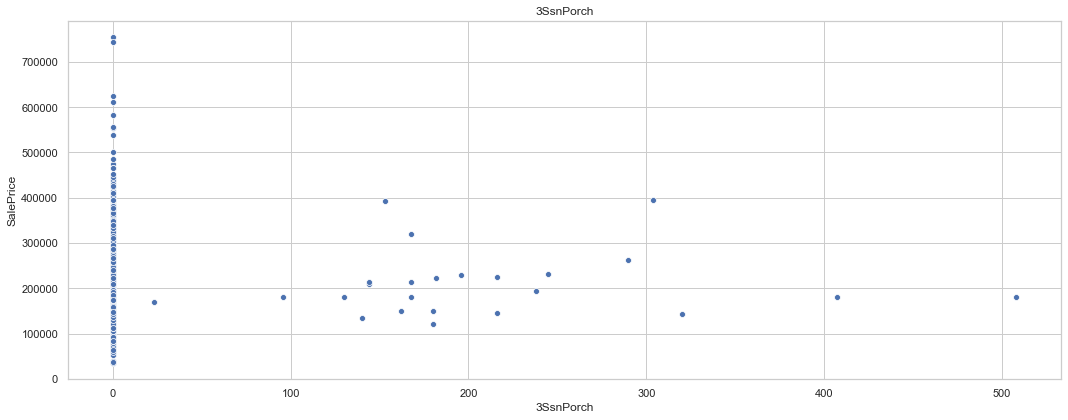

None

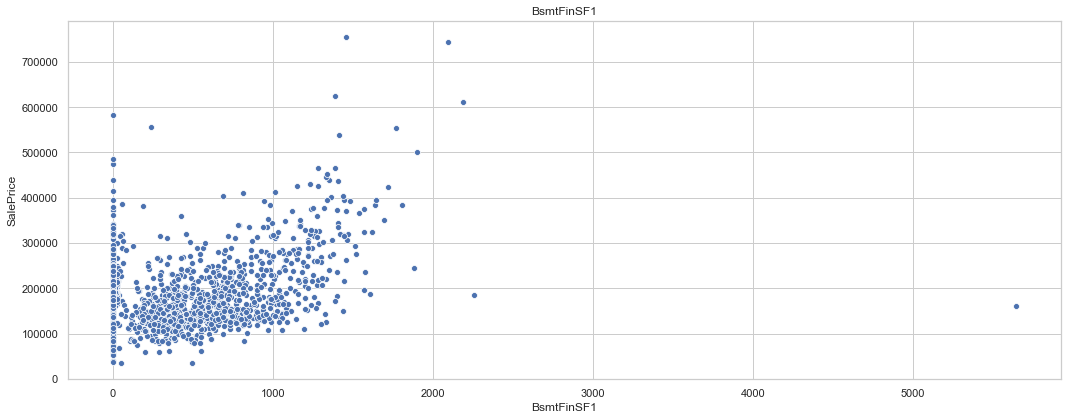

None

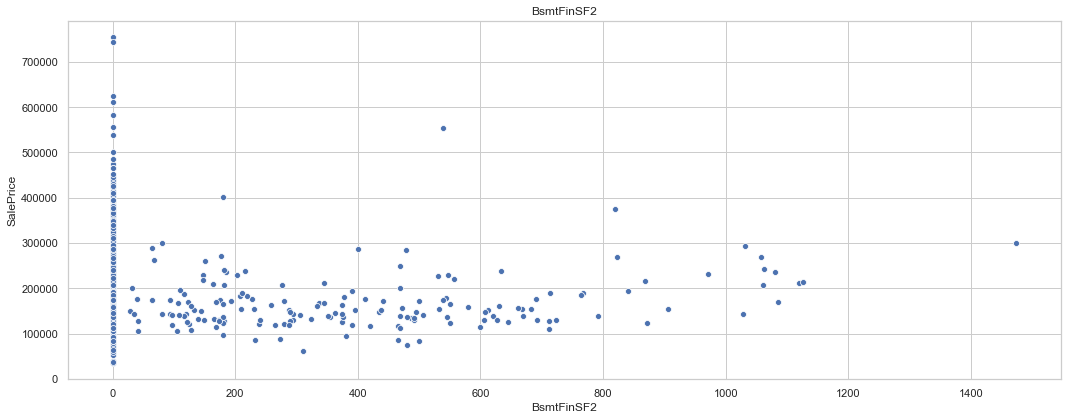

None

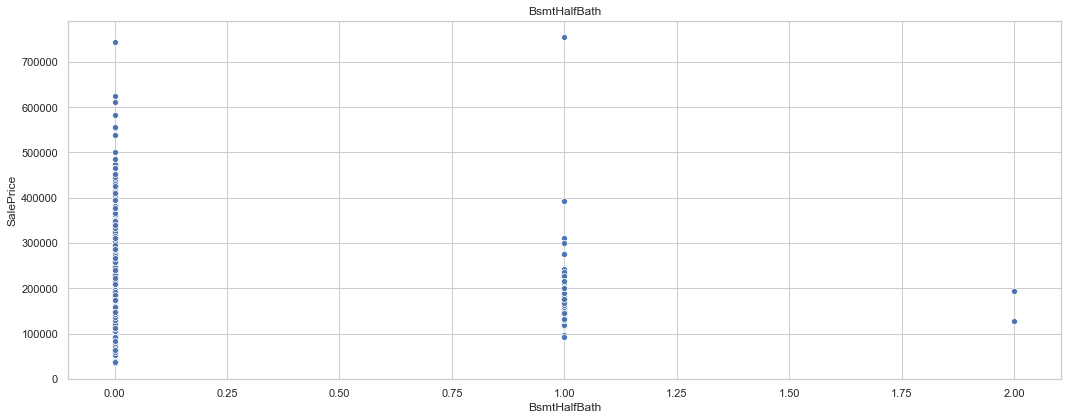

None

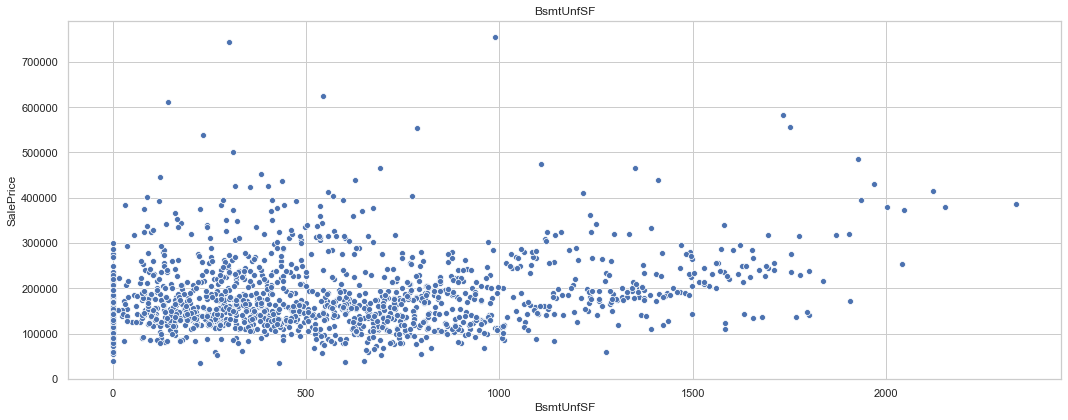

None

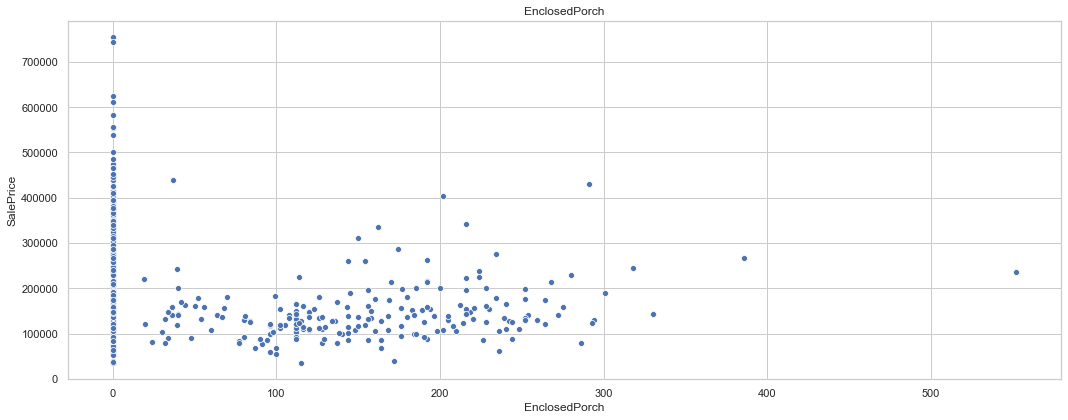

None

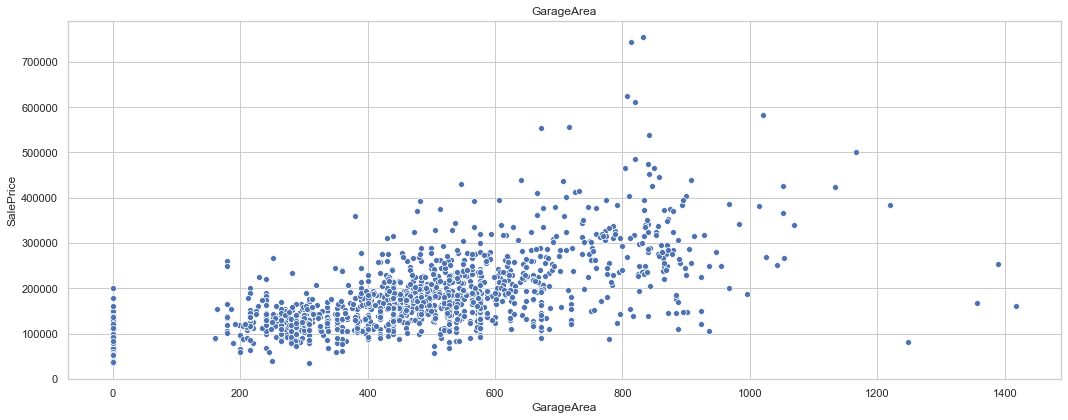

None

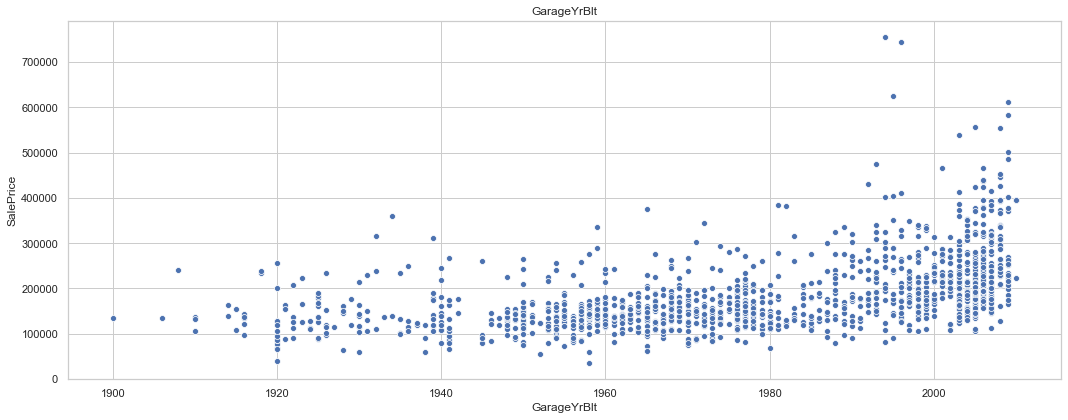

None

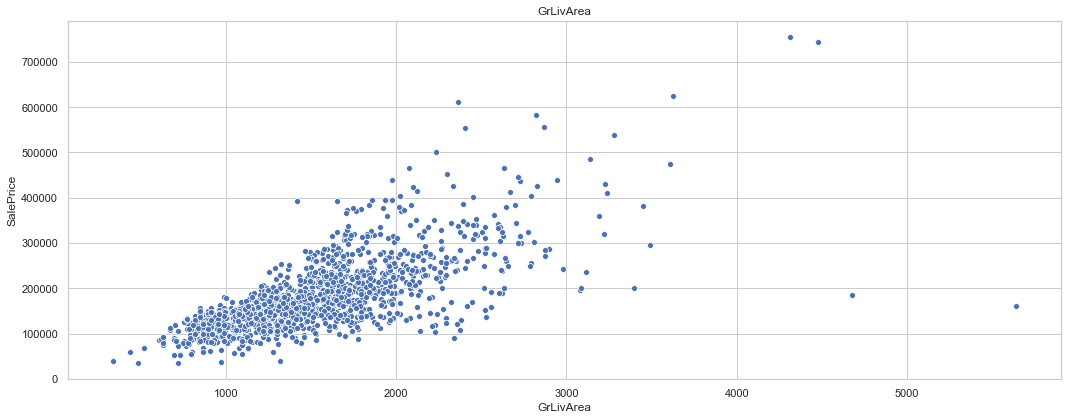

None

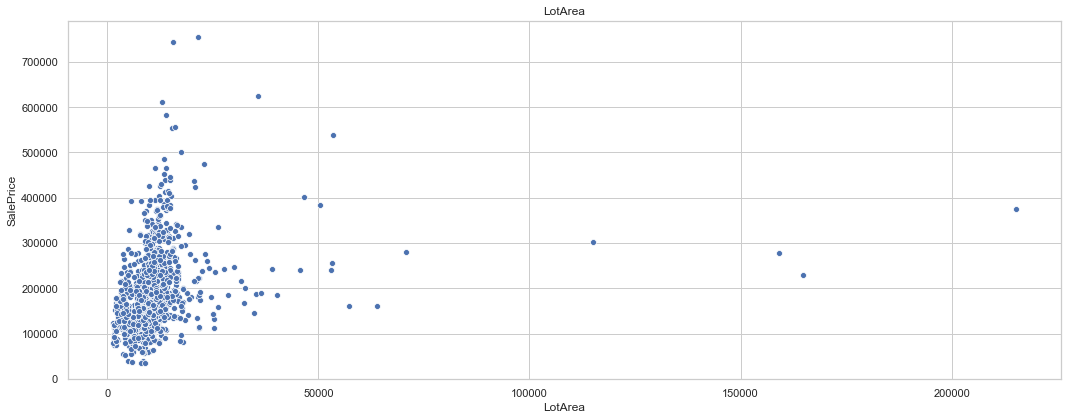

None

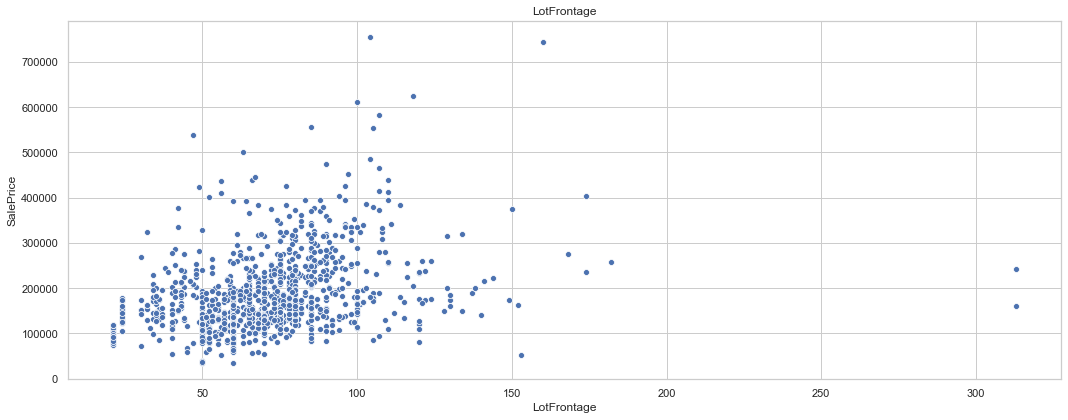

None

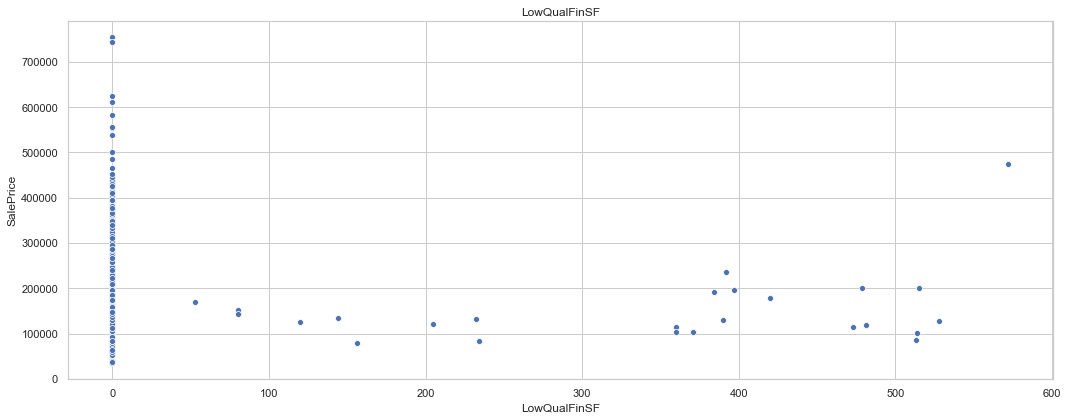

None

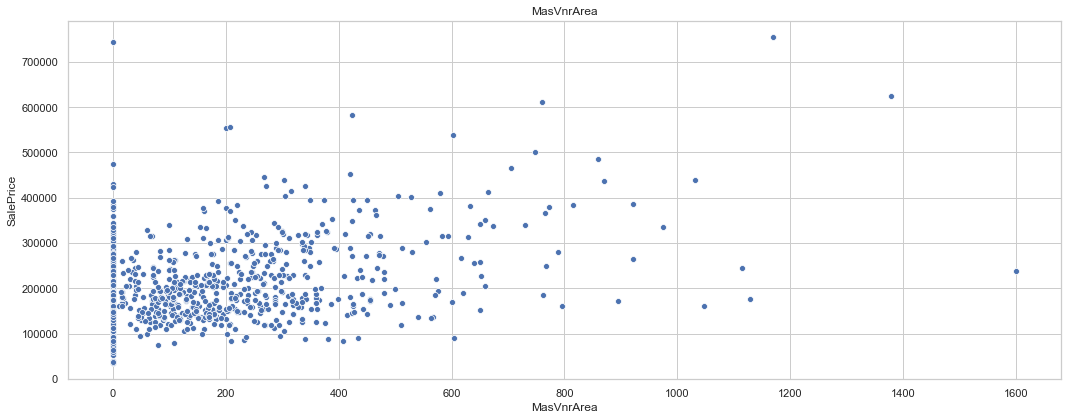

None

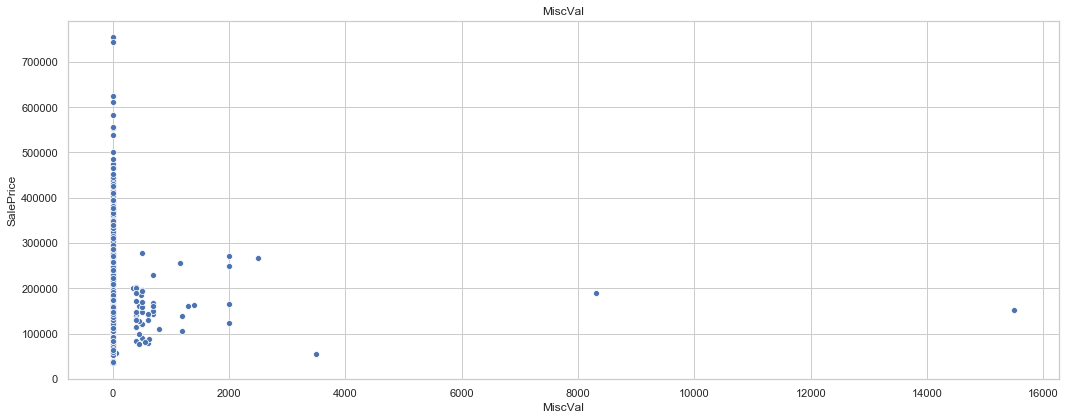

None

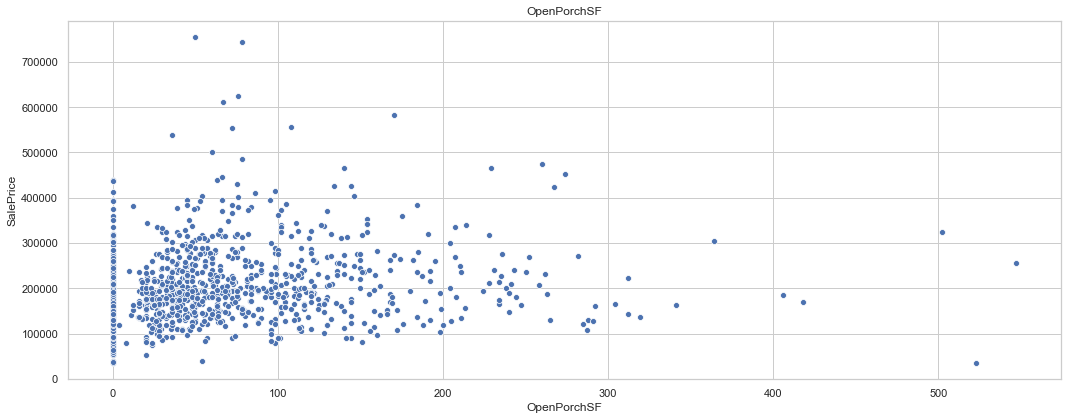

None

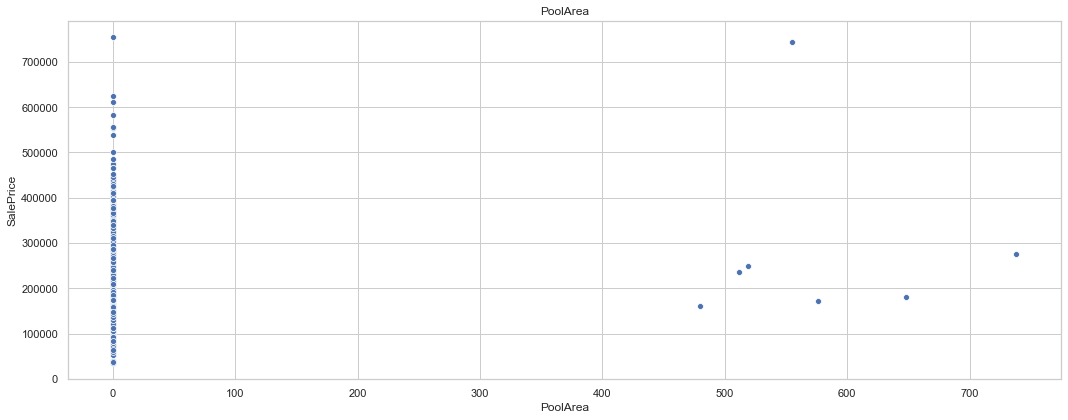

None

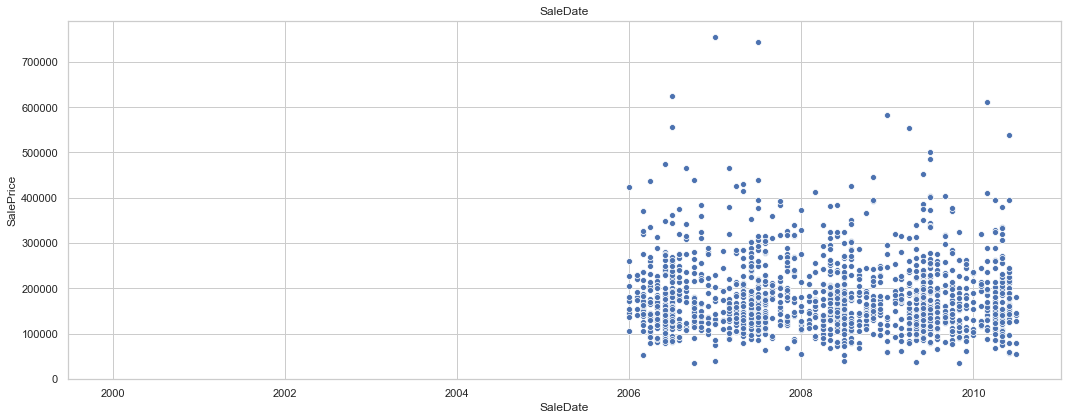

None

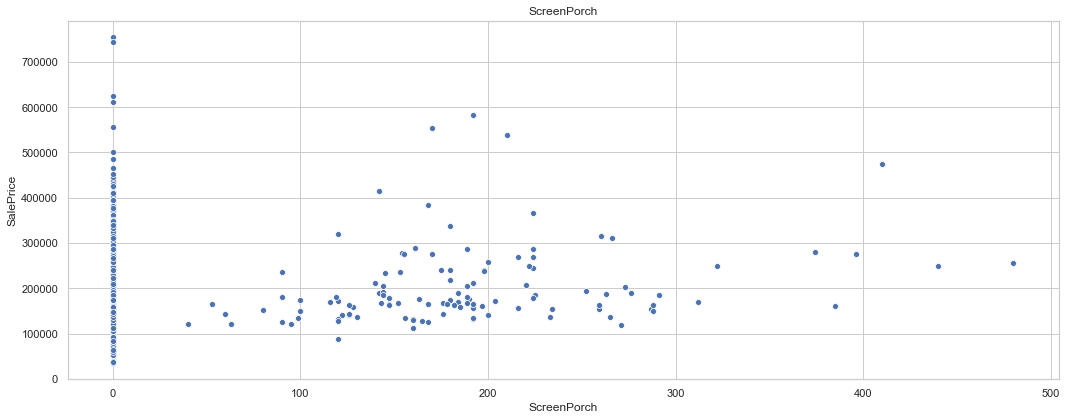

None

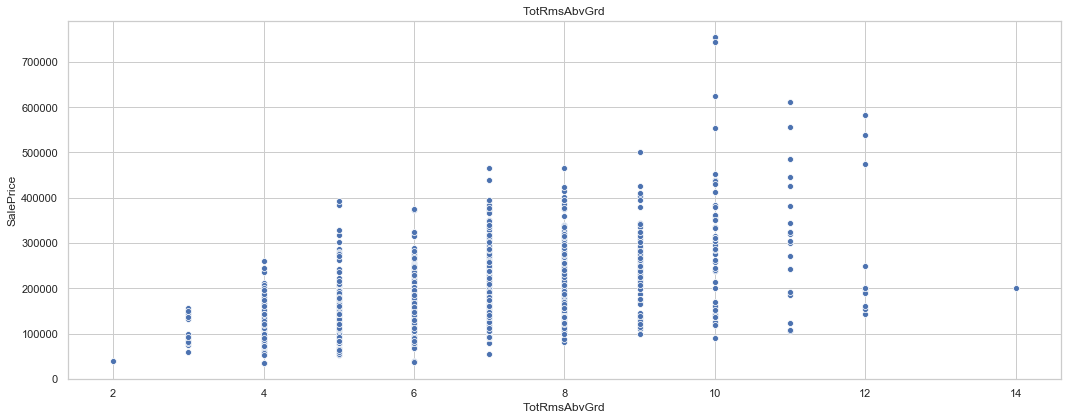

None

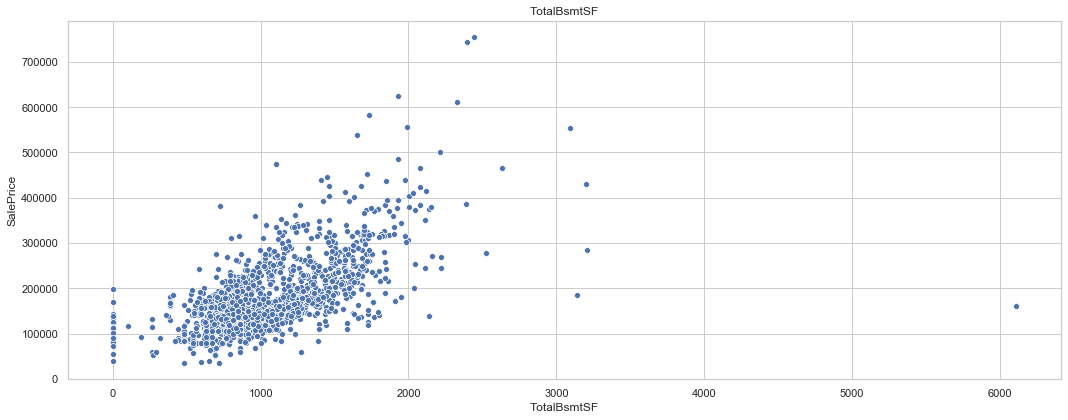

None

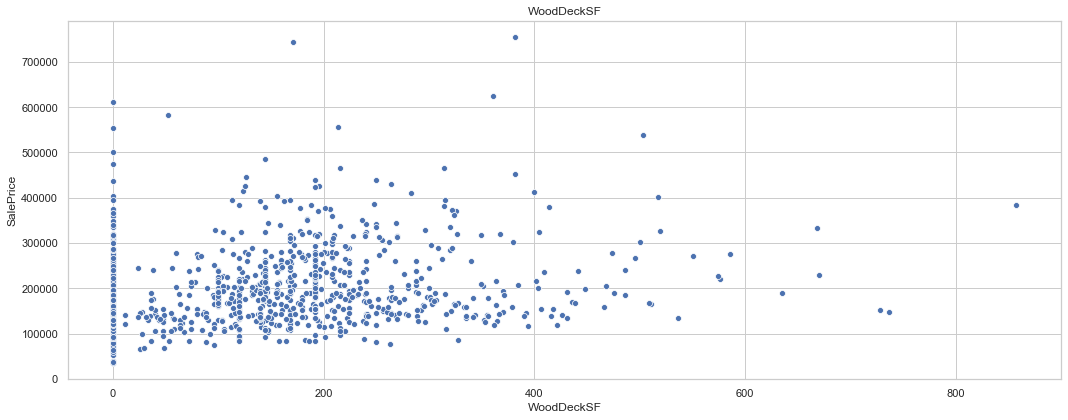

None

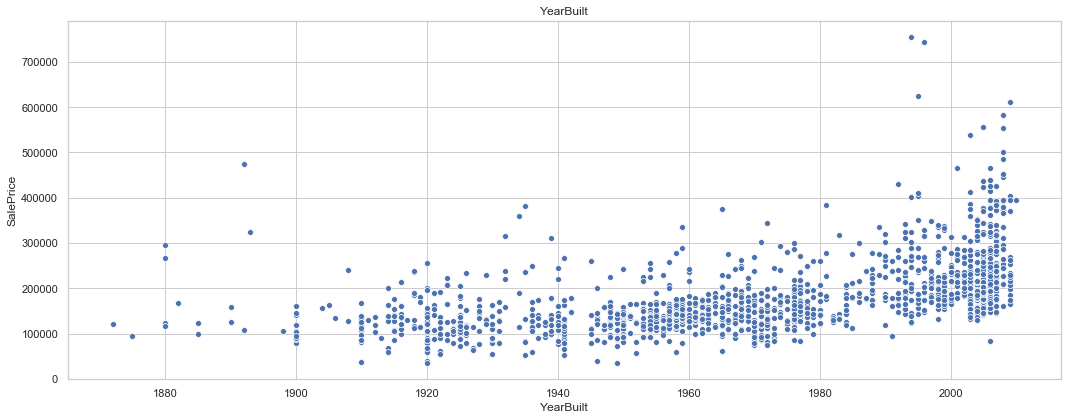

None

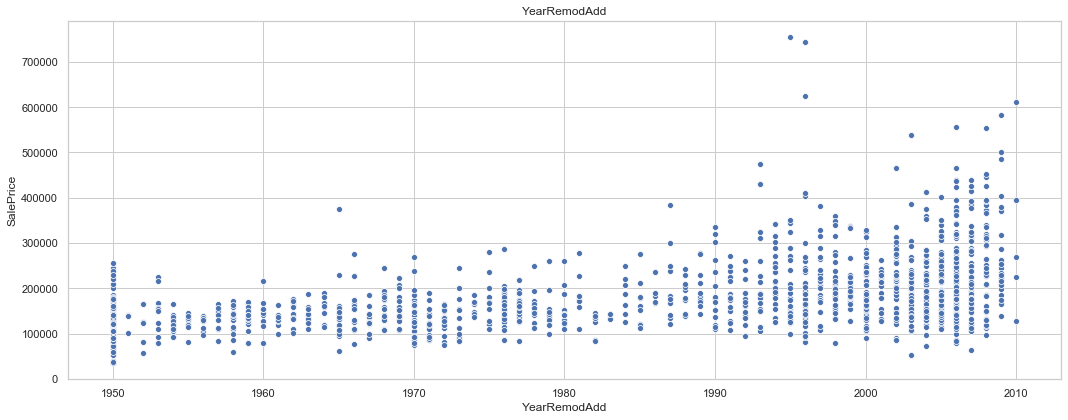

None

In [372]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'scatter']:
    clear_plot()
    
    fig, axarr = plt.subplots(nrows = 1, ncols = 1, figsize=(15,6))
    sns.scatterplot(x=feature, y='SalePrice', data=train_set, ax=axarr).set(title=feature)
    
    fig.tight_layout()
    display(plt.show())

#### Boxplots

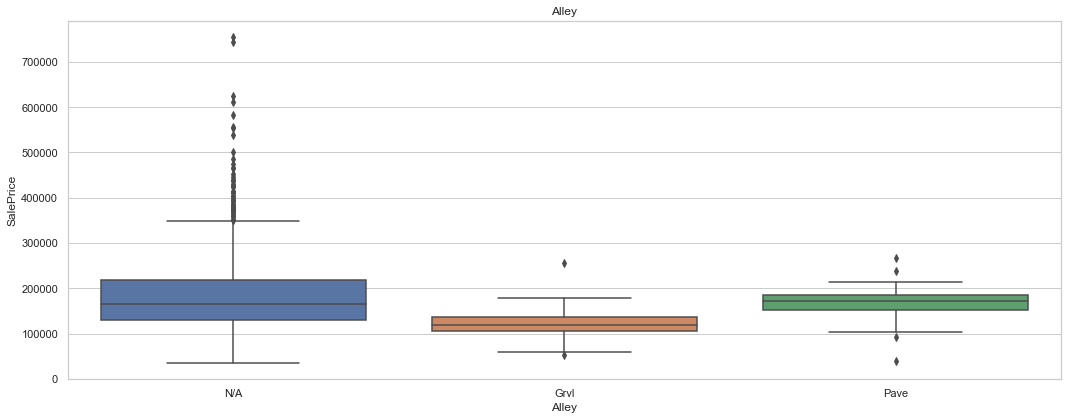

None

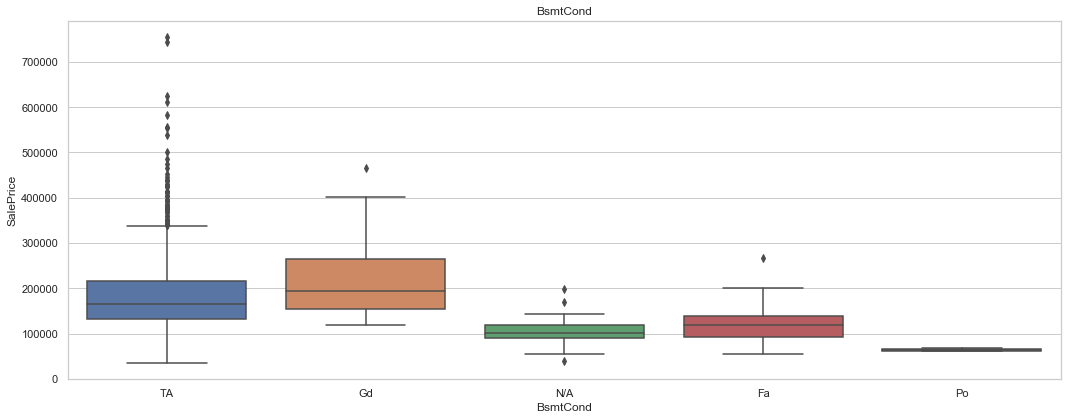

None

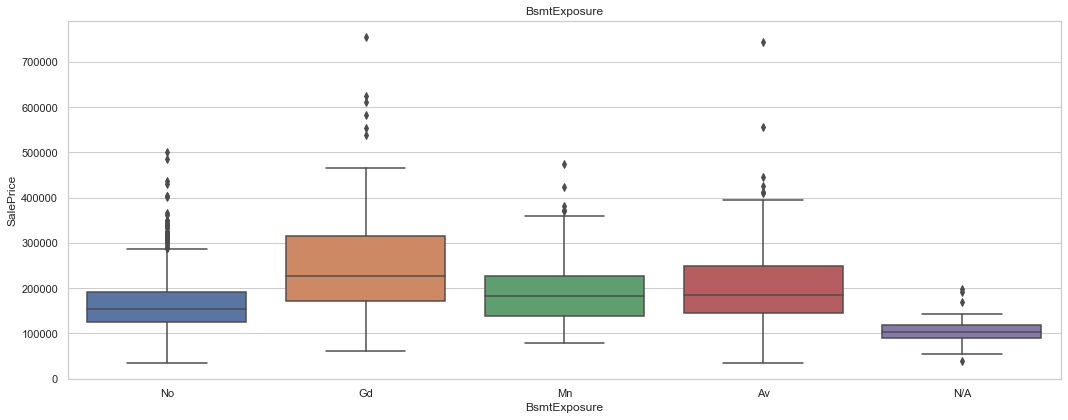

None

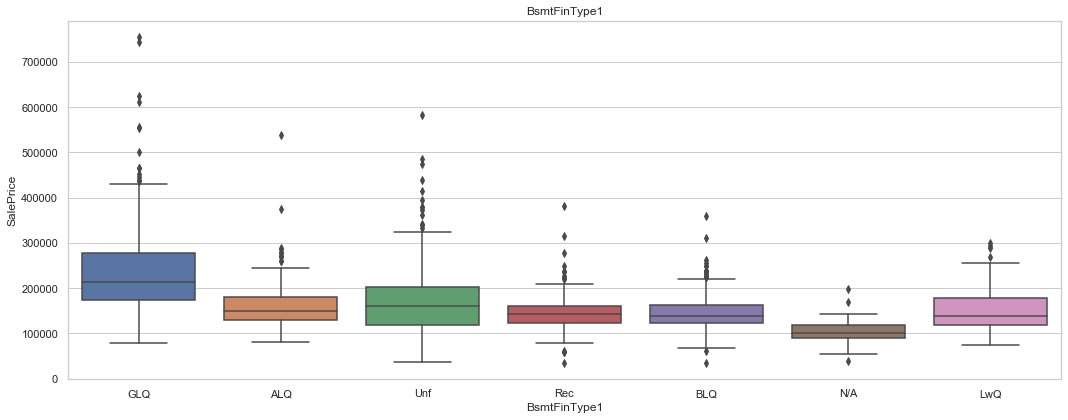

None

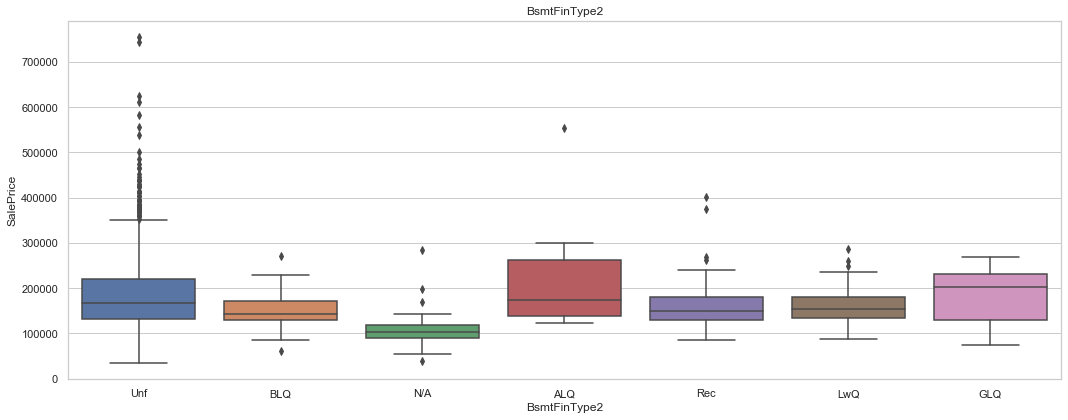

None

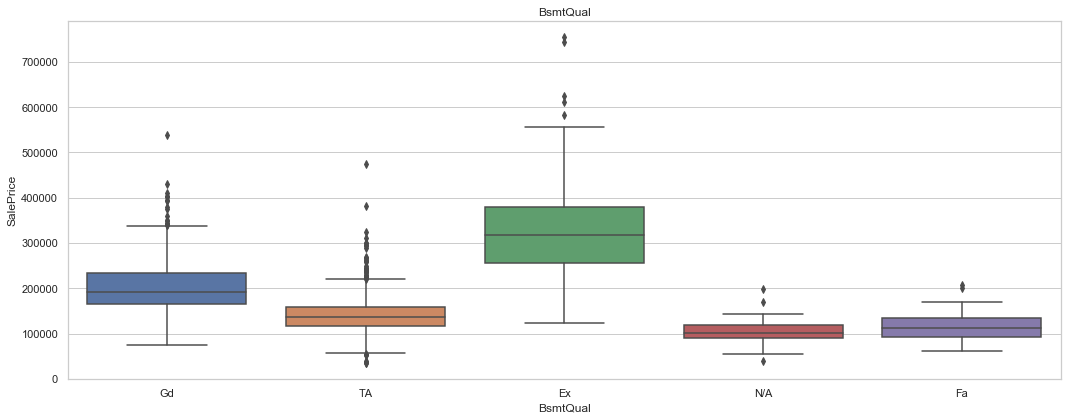

None

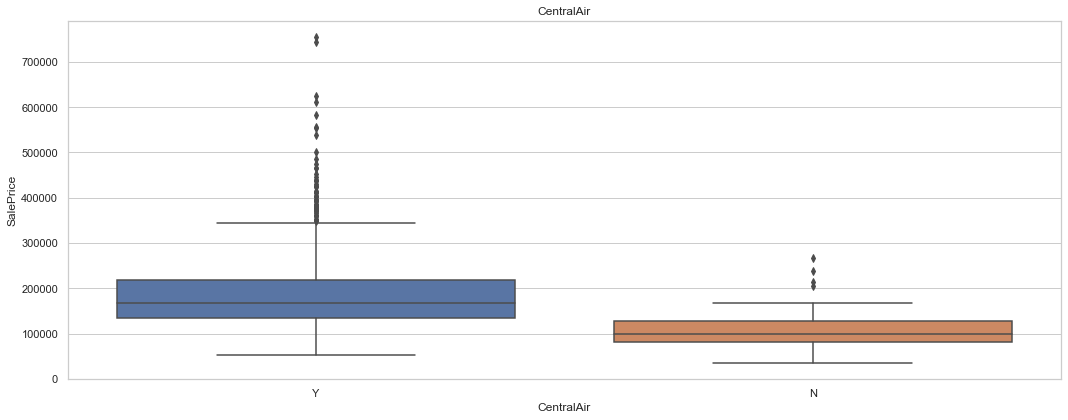

None

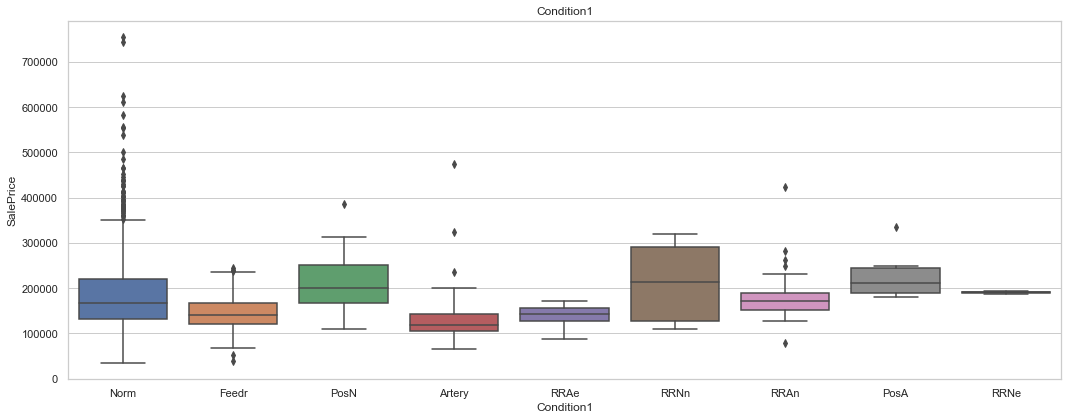

None

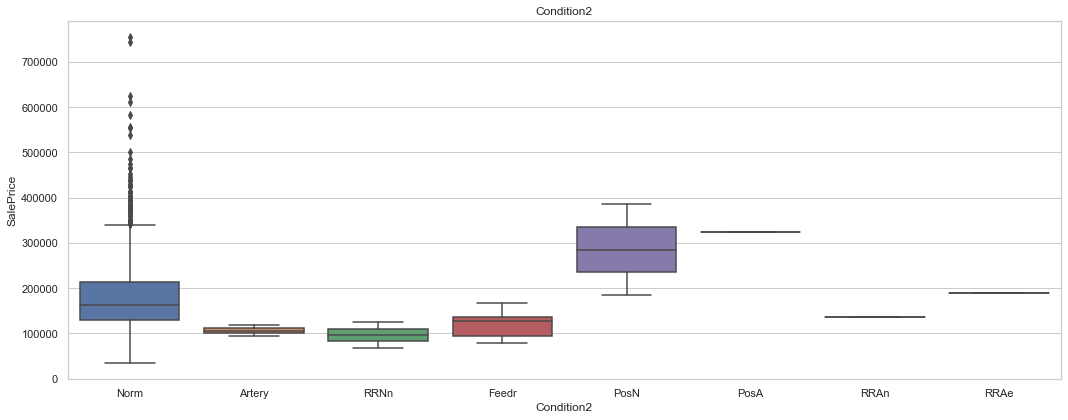

None

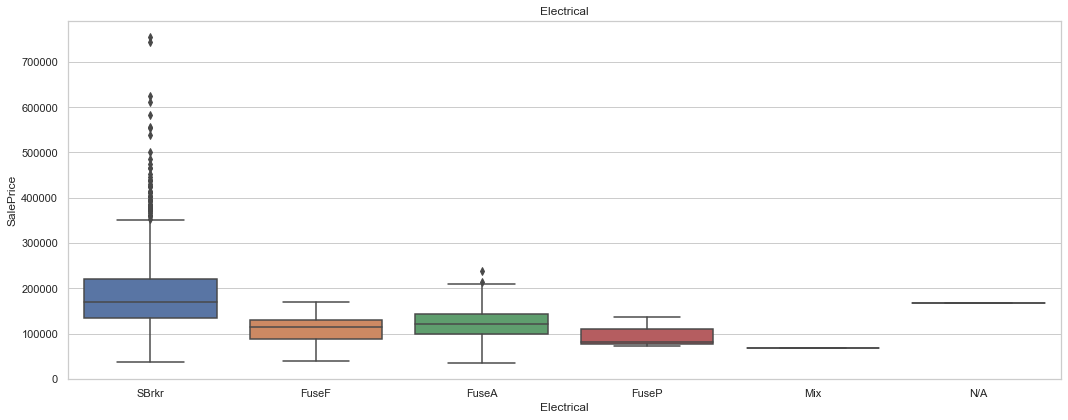

None

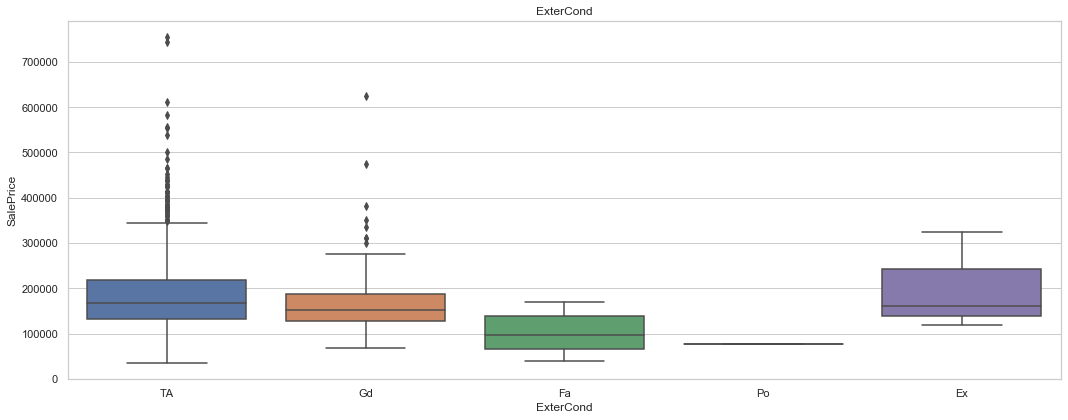

None

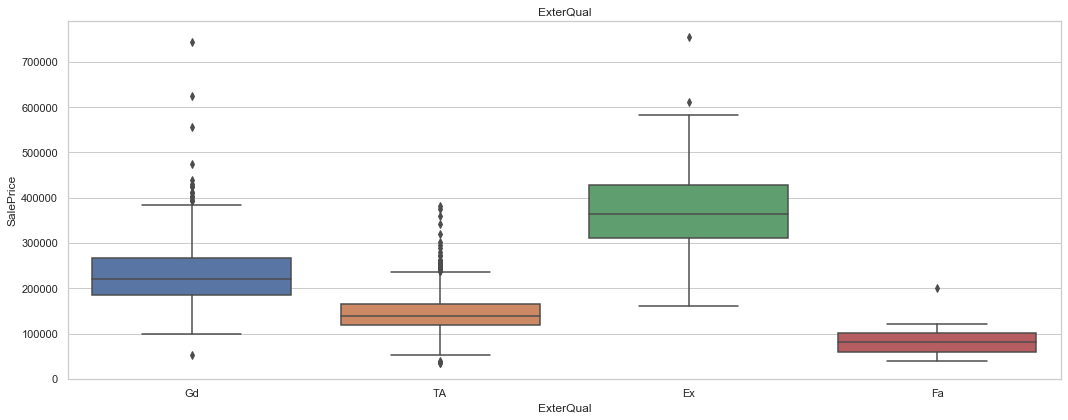

None

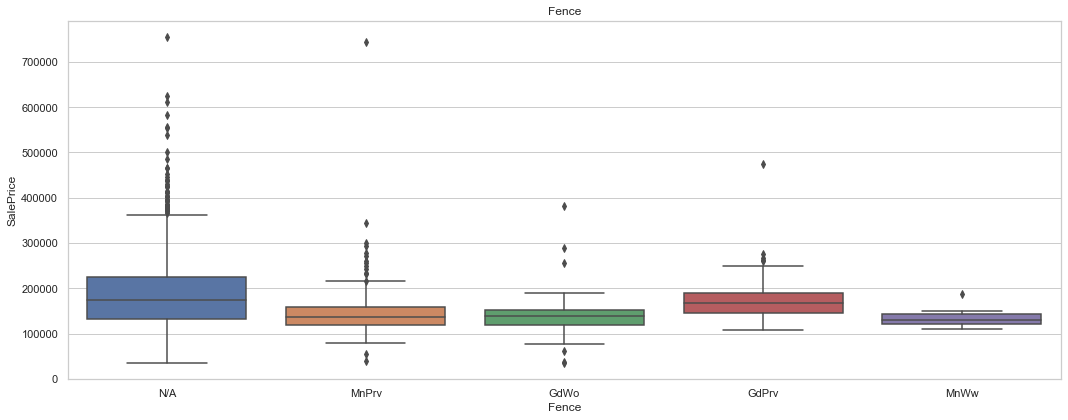

None

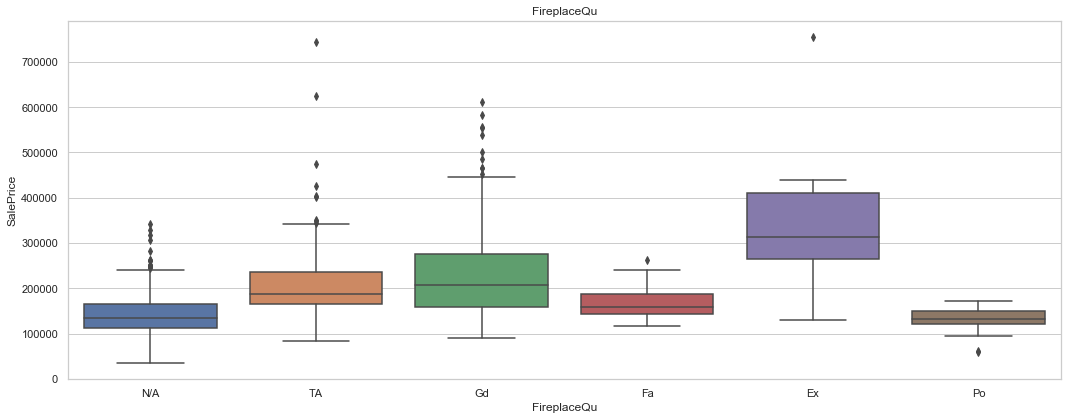

None

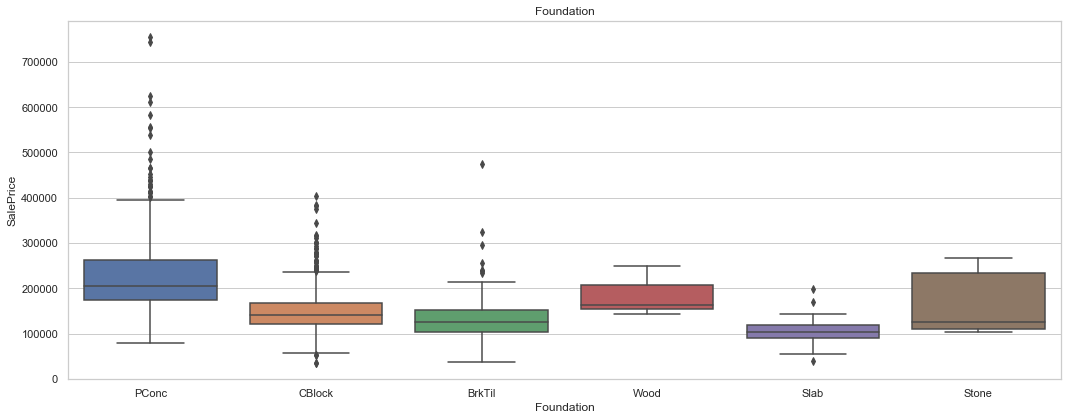

None

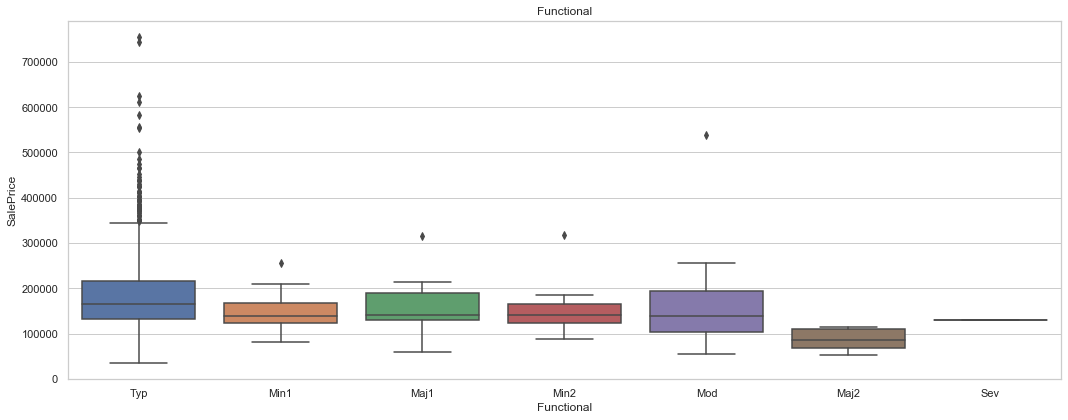

None

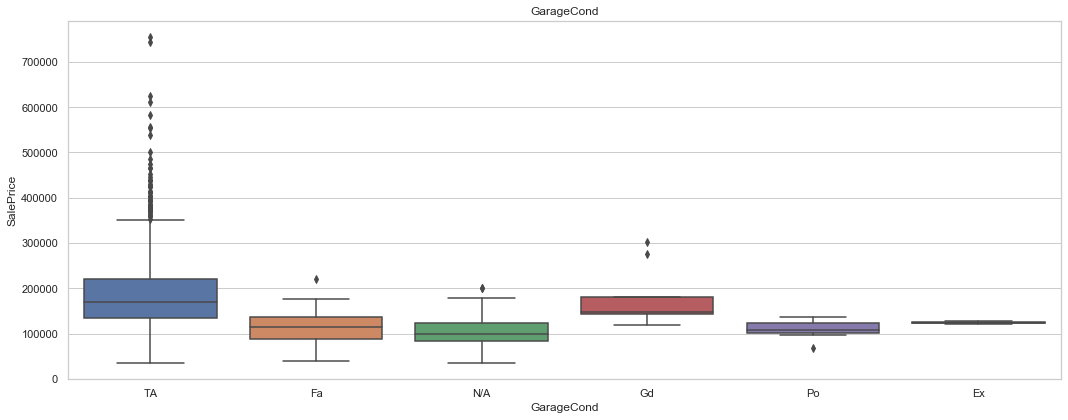

None

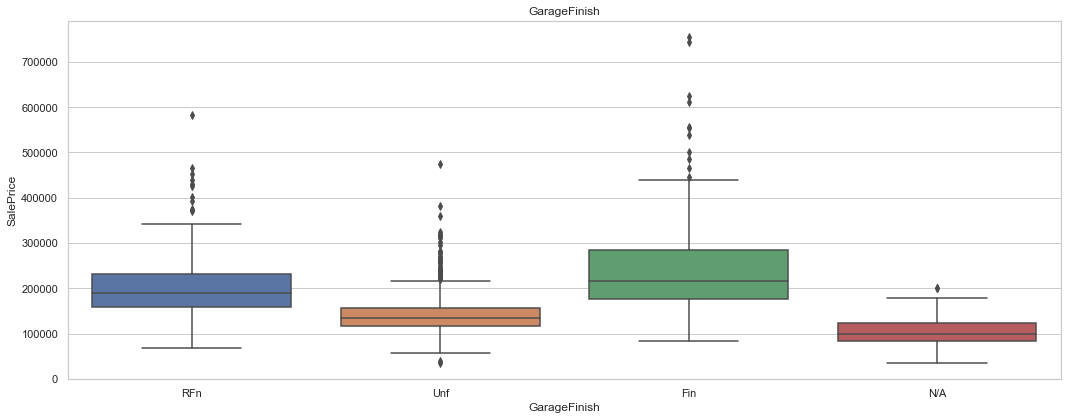

None

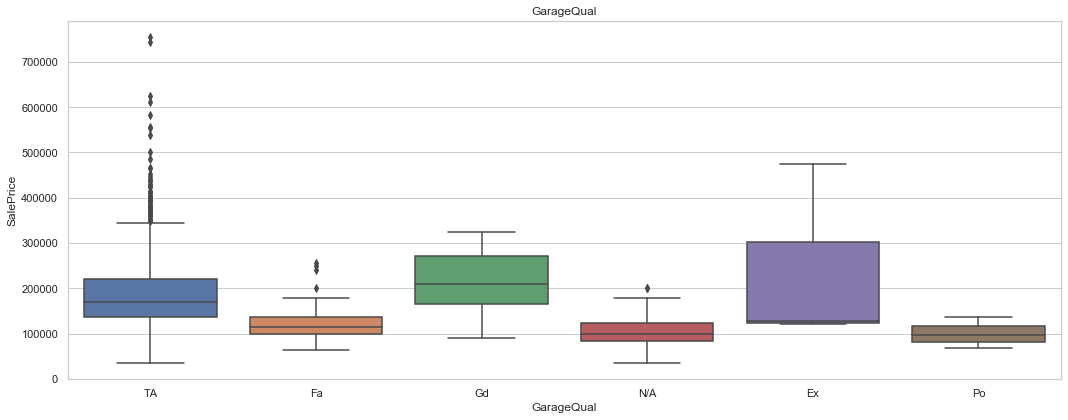

None

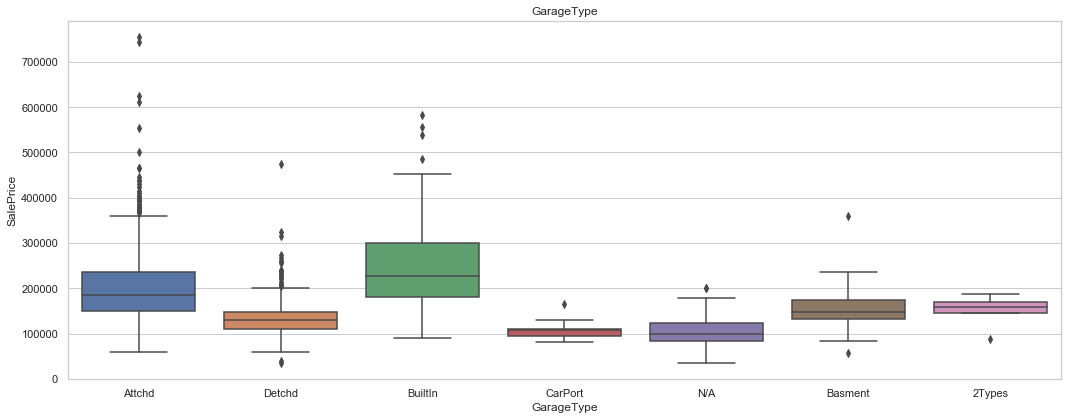

None

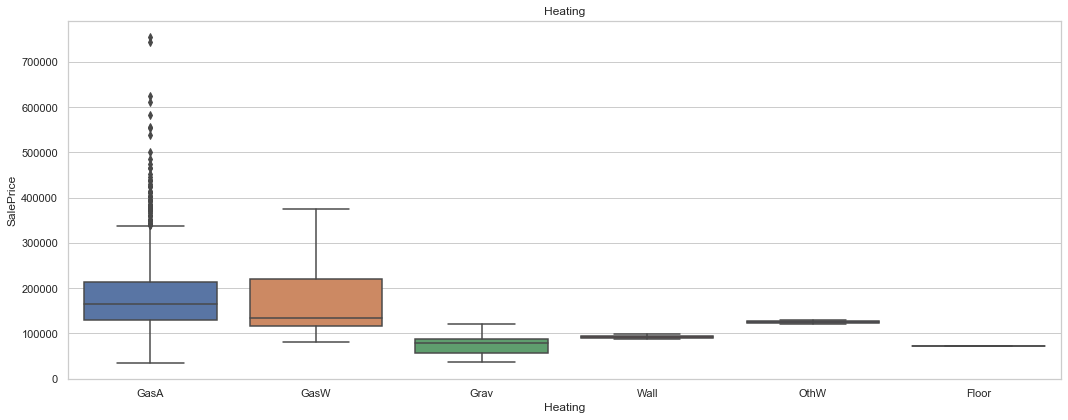

None

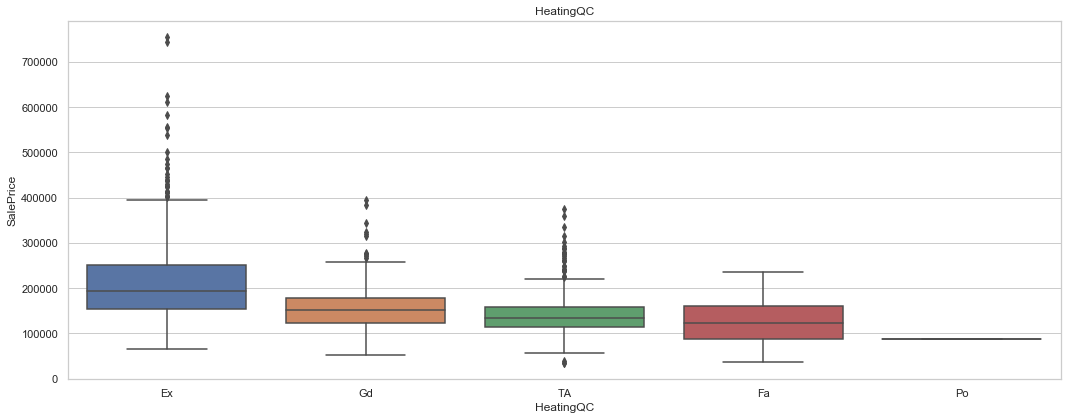

None

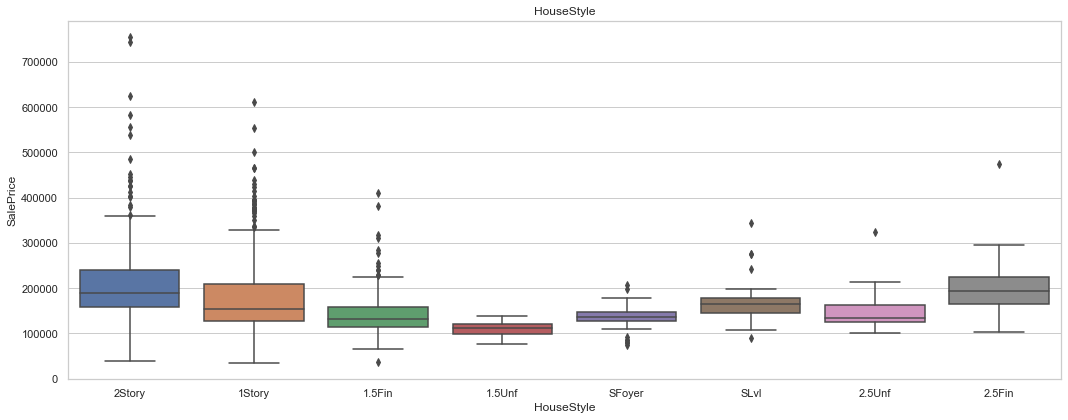

None

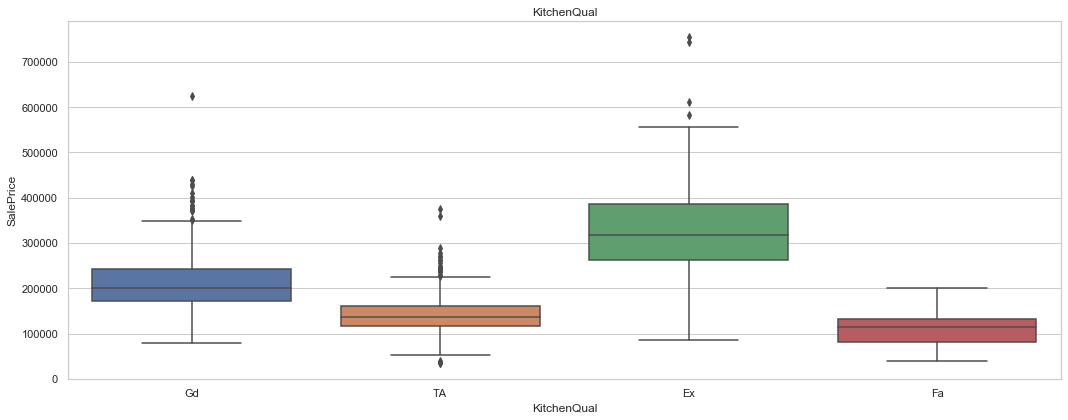

None

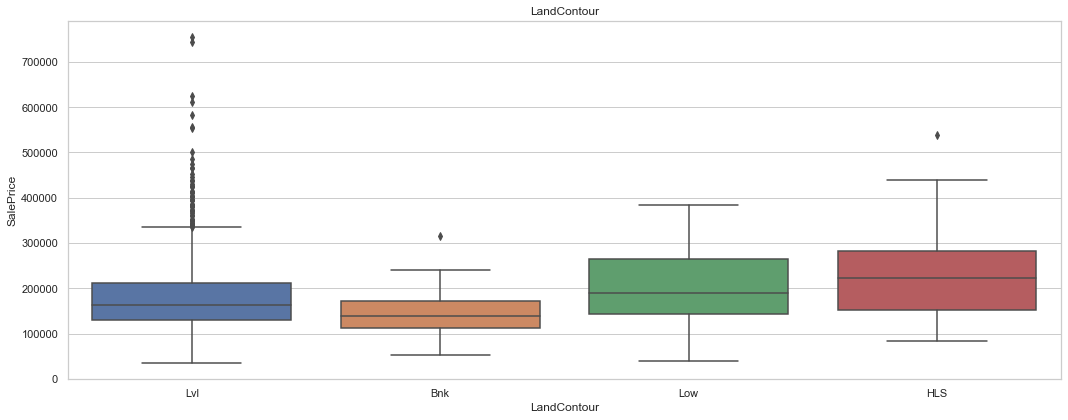

None

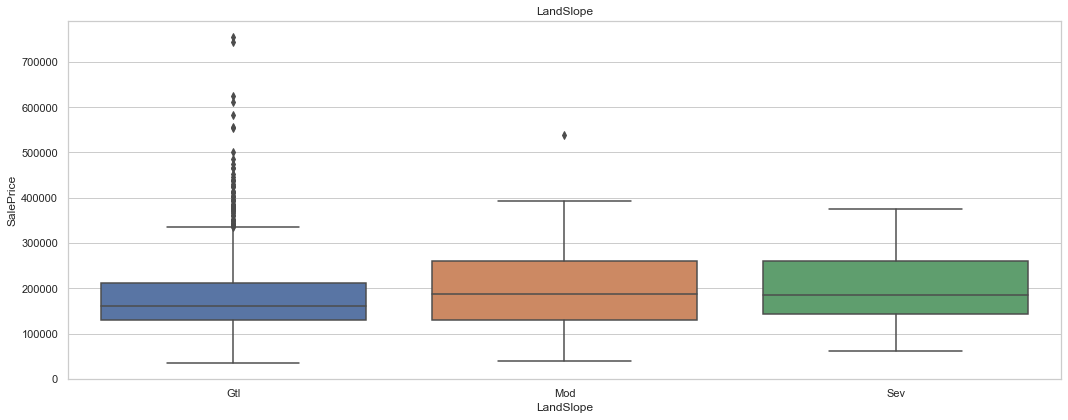

None

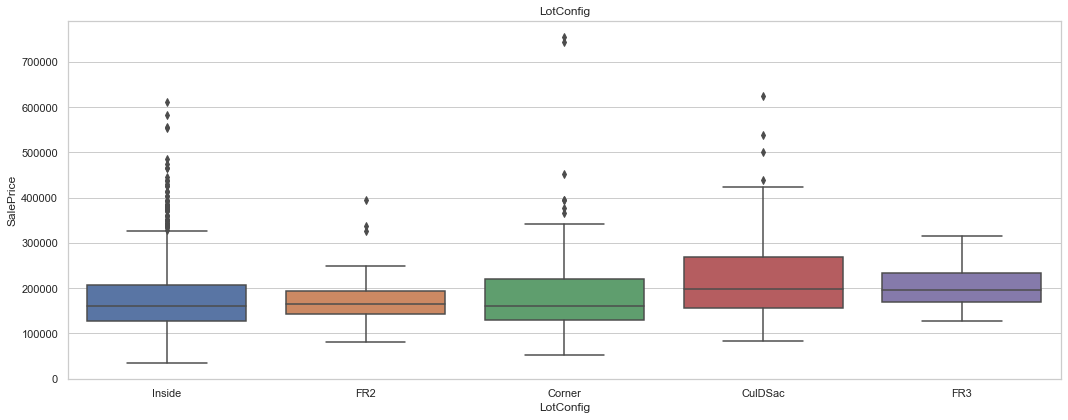

None

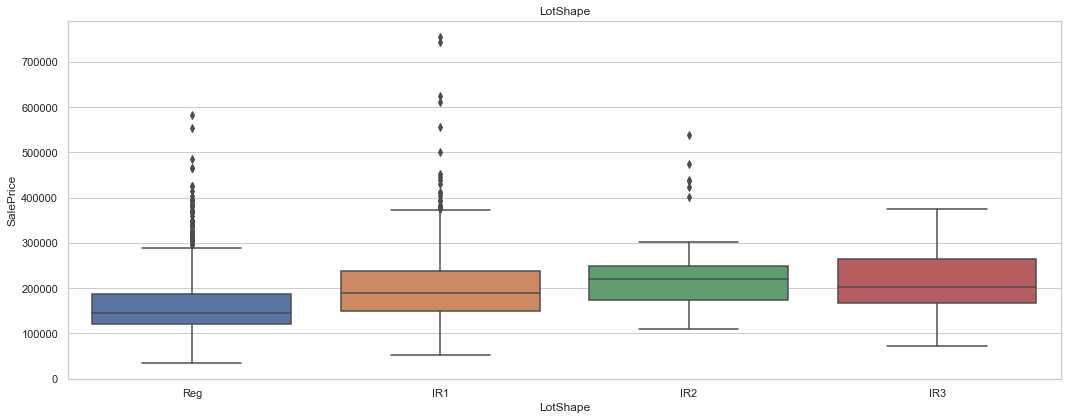

None

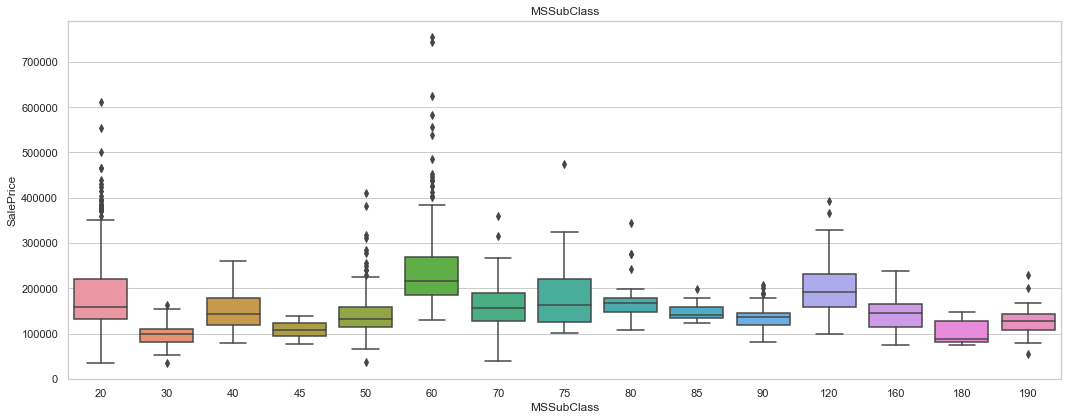

None

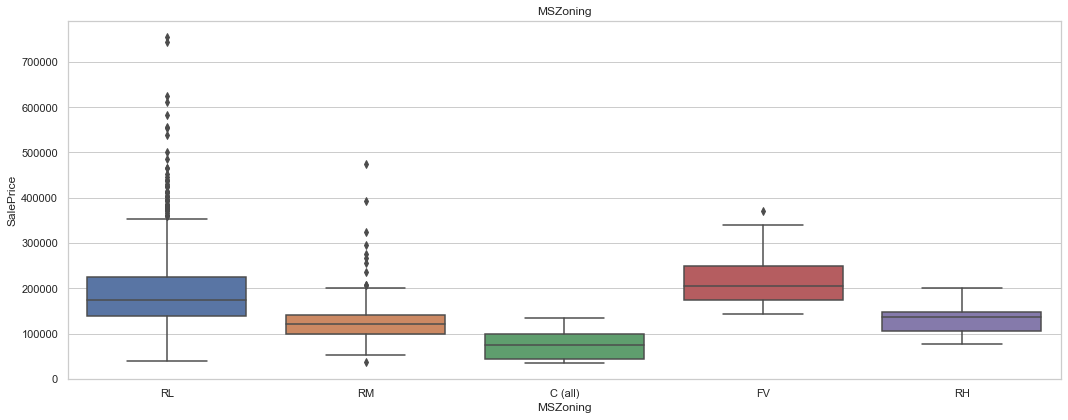

None

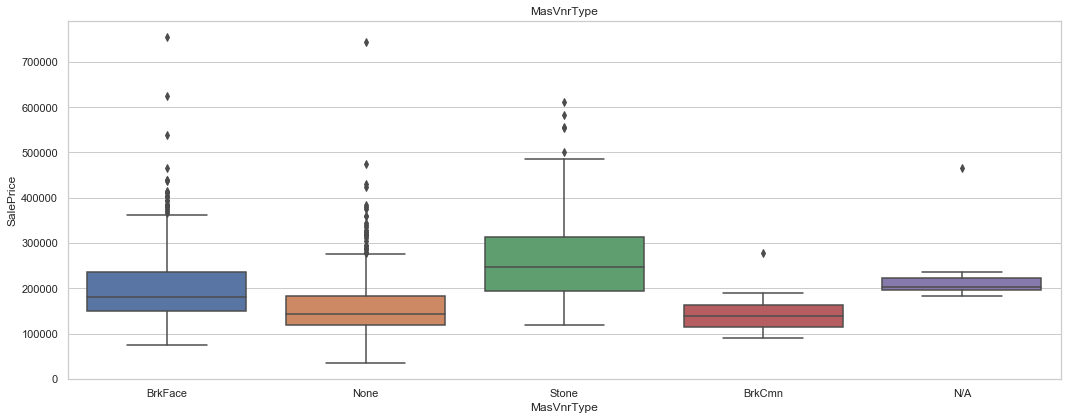

None

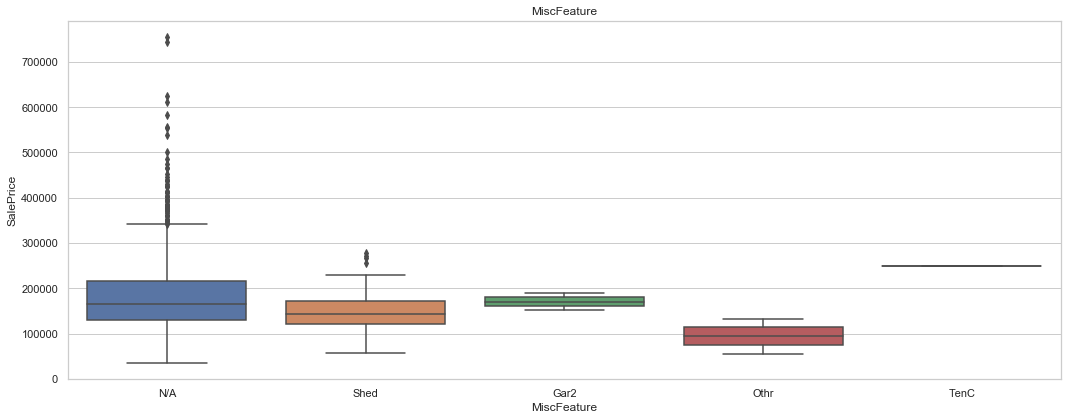

None

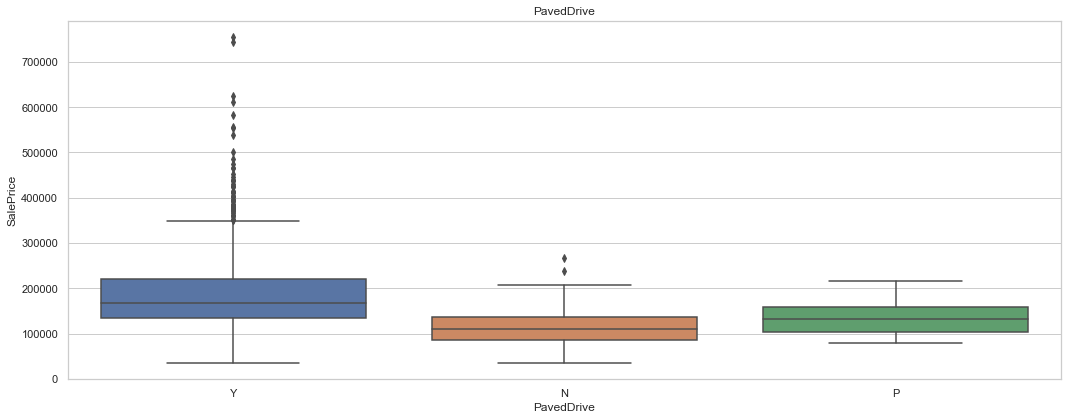

None

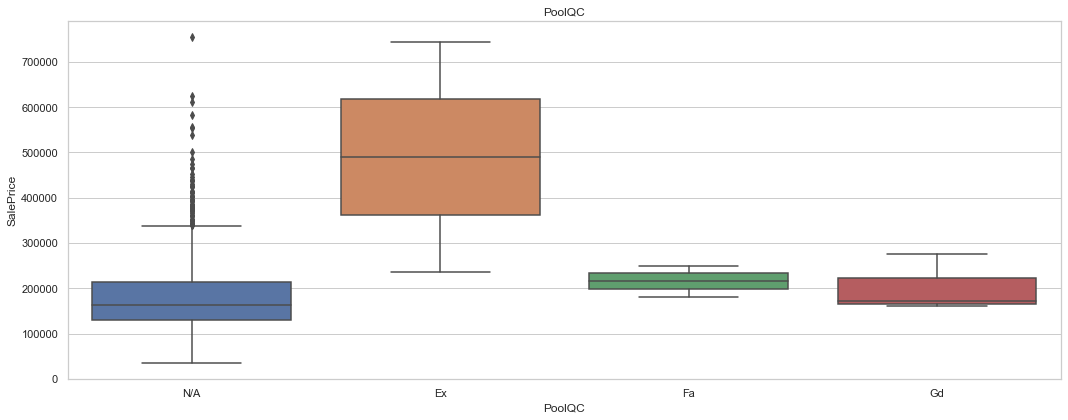

None

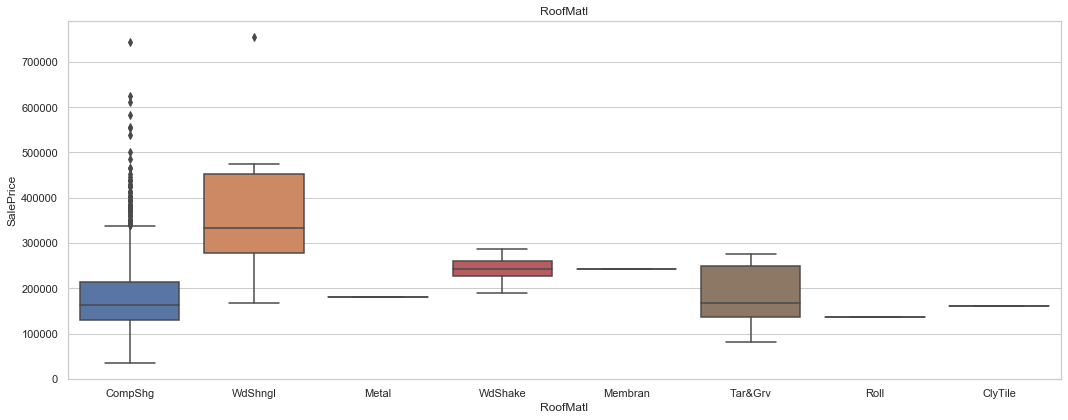

None

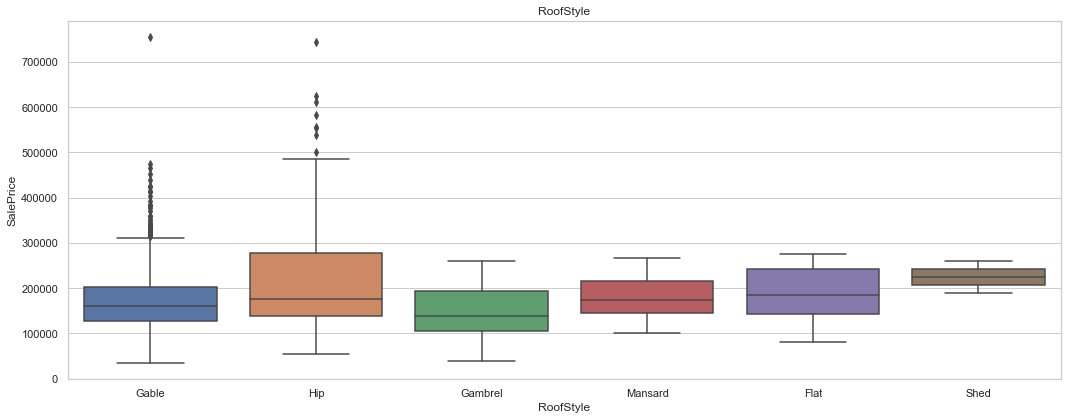

None

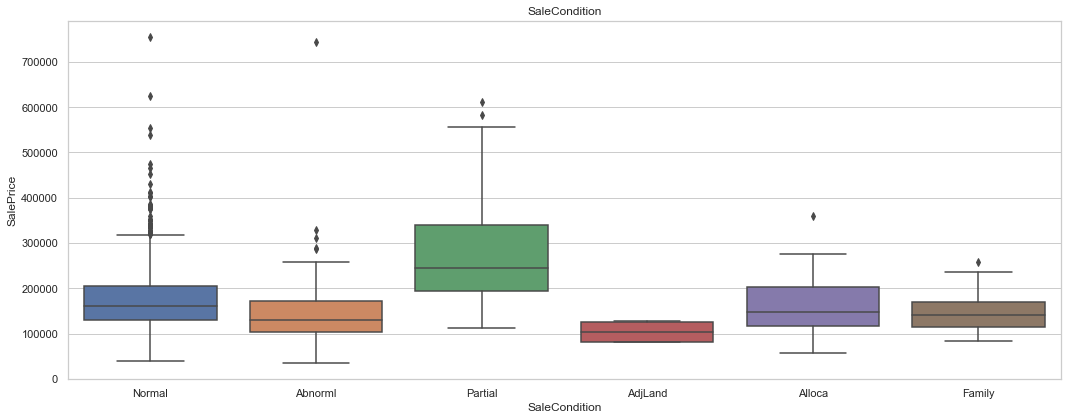

None

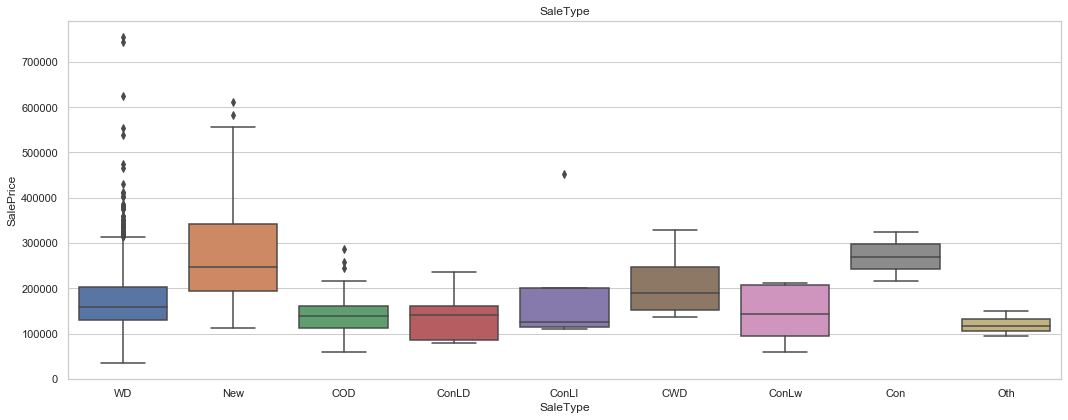

None

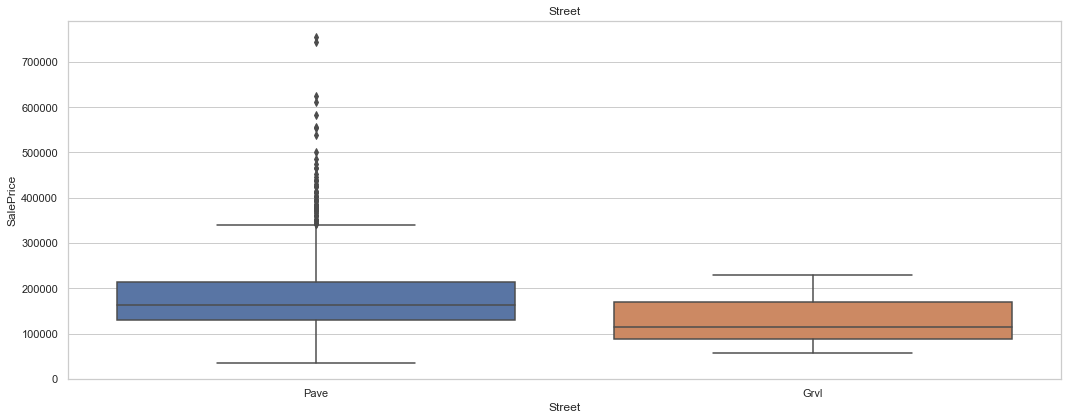

None

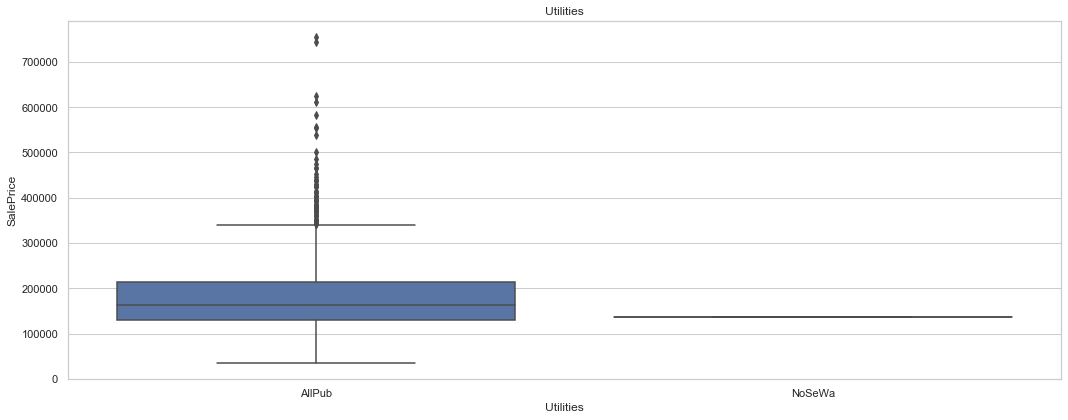

None

In [437]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'boxplot']:
    clear_plot()
    
    boxTranSetData = train_set[[feature, 'SalePrice']].fillna('N/A')
    fig, axarr = plt.subplots(nrows = 1, ncols = 1, figsize=(15,6))
    sns.boxplot(x=feature, y='SalePrice', data=boxTranSetData, ax=axarr).set(title=feature)
    
    fig.tight_layout()
    display(plt.show())

#### Mean-Median: Look at the mean, median, max, and min of columns with a lot of categories to see if it makes a difference

In [439]:
for feature in [key for key, value in cols_to_inspect.items() if value == 'mean-median']:
    featureFacts = train_set[[feature, 'SalePrice']]
    featureFacts = featureFacts.groupby(feature).agg([np.mean, np.median, np.min, np.max]).reset_index()
    display(featureFacts.sort_values(('SalePrice', 'mean'), ascending=False))

Exterior1st      SalePrice                          
                         mean    median    amin    amax
7      ImStucc  262000.000000  262000.0  262000  262000
10       Stone  258500.000000  258500.0  230000  287000
5      CemntBd  231690.655738  236500.0   75000  556581
12     VinylSd  213732.900971  200000.0   37900  611657
3      BrkFace  194573.000000  165750.0   40000  430000
9      Plywood  175942.379630  167450.0   82500  345000
6      HdBoard  163077.450450  149900.0   83000  755000
11      Stucco  162990.000000  144000.0   58500  381000
14     WdShing  150655.076923  128700.0   87000  385000
13     Wd Sdng  149841.645631  138943.5   34900  745000
8      MetalSd  149422.177273  139000.0   62383  392000
0      AsbShng  107385.550000  108000.0   35311  165500
4       CBlock  105000.000000  105000.0  105000  105000
1      AsphShn  100000.000000  100000.0  100000  100000
2      BrkComm   71000.000000   71000.0   60000   82000

Exterior2nd      SalePrice                          
                         mean    median    amin    amax
9        Other  319000.000000  319000.0  319000  319000
7      ImStucc  252070.000000  187600.0   88000  745000
5      CmentBd  230093.833333  238750.0   75000  556581
13     VinylSd  214432.460317  200070.5   37900  611657
3      BrkFace  195818.000000  160000.0   40000  430000
10     Plywood  168112.387324  160750.0   76500  320000
6      HdBoard  167661.565217  155000.0   83000  755000
15     Wd Shng  161328.947368  138225.0   55000  538000
11       Stone  158224.800000  177000.0   90000  230000
12      Stucco  155905.153846  142000.0   58500  381000
8      MetalSd  149803.172897  138750.0   62383  392000
14     Wd Sdng  148386.065990  138000.0   34900  475000
1      AsphShn  138000.000000  139000.0  100000  175000
2      Brk Cmn  126714.285714  147000.0   60000  155000
0      AsbShng  114060.550000  111000.0   35311  225000
4       CBlock  105000.000000  105000.0  105000  105000

Neighborhood      SalePrice                        
                          mean  median    amin    amax
15      NoRidge  335295.317073  301500  190000  755000
16      NridgHt  316270.623377  315000  154000  611657
22      StoneBr  310499.000000  278000  170000  556581
23       Timber  242247.447368  228475  137500  378500
24      Veenker  238772.727273  218000  162500  385000
21      Somerst  225379.837209  225500  144152  423000
4       ClearCr  212565.428571  200250  130000  328000
6       Crawfor  210624.725490  200624   90350  392500
5       CollgCr  197965.773333  197200  110000  424870
0       Blmngtn  194870.882353  191000  159895  264561
8       Gilbert  192854.506329  181000  141000  377500
14       NWAmes  189050.068493  182900   82500  299800
20      SawyerW  186555.796610  179900   76000  320000
11      Mitchel  156270.122449  153500   84500  271000
12        NAmes  145847.080000  140000   87500  345000
13      NPkVill  142694.444444  146000  127500  155000
18        SWISU  142591.360000  139500   60000  200000
1       Blueste  137500.000000  137500  124000  151000
19       Sawyer  136793.135135  135000   62383  190000
17      OldTown  128225.300885  119000   37900  475000
7       Edwards  128219.700000  121750   58500  320000
3       BrkSide  124834.051724  124300   39300  223500
2        BrDale  104493.750000  106000   83000  125000
9        IDOTRR  100123.783784  103000   34900  169500
10      MeadowV   98576.470588   88000   75000  151400

### Conclusions

### Both Scatter and Boxplots

#### BedroomAbGr (Bedrooms above grade - does NOT include basement bedrooms)
Homes with 3 and 4 bedrooms add the most value and at 5 it starts diminishing. There are a lot of outliers with 2, 3, and 4 bedrooms but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### BsmtFullBath (Basement full bathrooms)
Homes with 1 and 2 basement full bathrooms add value and at 3 it starts to diminish. There are a lot of outliers with 0 and 1 basement full bathrooms but it is above the upper whisker which means that the outliers indicate a higher SalePrice and the fact that the outliers are also present on 0 basement full baths indicates that bathrooms in the basement don’t add a lot to the SalePrice

#### BsmtHalfBath (Basement half bathrooms)
Homes with a basement half bathrooms do not appear to be a good predictor of SalePrice

#### Fireplaces (Number of fireplaces)
Homes increase with the more fireplaces they have. There are a lot of outliers with 0, 1, and 2 fireplaces but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### FullBath (Full bathrooms above grade)
Homes increase with the more full baths they have. There are a lot of outliers with 1 and 2 full baths but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### GarageCars (Size of garage in car capacity)
Homes increase with the more cars that can fit in the garage. There are a lot of outliers with 1, 2, and 3 cars but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### HalfBath (Half baths above grade)
Homes increase with the with 1 half bath as opposed to 0, but there is a diminishing return when there are 2 half baths . There are a lot of outliers with 0 and 1 half baths but it is above the upper whisker which means that the outliers indicate a higher SalePrice. 

#### KitchenAbvGr (Kitchens above grade)
Homes increase when there is at least 1 kitchen and there is not a lot of value added when additional kitchens exist within a house. If there are no kitchens the SalePrice is very low. There are a lot of outliers with homes with 1 kitchen which indicates that linking this to an additional attribute such as KitchenQual is needed to quantify the impact on the SalePrice and the number of kitchens is a poor predictor of SalePrice.

#### OverallCond (Rates the overall condition of the house)
The overall condition is a good predictor of SalePrice from the ratio of 1 to 5 but then it starts diminishing and leveling off from 6 to 8. When the overall condition is 9 it adds a lot of value to the SalePrice. Since there are a lot of outliers, specially at the OverallCond of 5, it indicates this need to be linked to additional features or we can only consider OveralllConds from 1 to 5 as good predictors

#### OverallQual (Rates the overall material and finish of the house)
The overall quality is the strongest predictor for the SalePrice of a home and as the ratio increases from 1 to 10, we can see the SalePrice increase positively. This will be the main feature we want to consider in our model.

#### TotalRmsAbvGrd
The total rooms above grade do appear to add value as it increases but the whiskers get larget the higher it gets and there are a lot of outliers at 4, 5, 6, 7, and 8. This may or may not be good predictor for SalePrice. To better determine we will evaluate the coef to SalePrice

### Scatter Plots

The following features have a positive correlation which indicates they are good predictors for determining the SalePrice
- 1stFlrSF (First Floor square feet)
- GrLivArea (Above grade (ground) living area square feet)
- TotalBsmtSF (Total square feet of basement area)


The following features have no correlation and do not appear to be good predictors of SalePrice
- 2ndFlrSF (Second floor square feet) – some homes have no second floor so we may have to deal with this ater
- 3SsnPorch (Three season porch area in square feet)
- BsmtFinSF1 (Type 1 finished square feet)
- BsmtFinSF2 (Type 2 finished square feet)
- BsmtUnfSF (Unfinished square feet of basement area)
- EnclosedPorch (Enclosed porch area in square feet)
- GarageArea (Size of garage in square feet)
- GarageYrBlt (Year garage was built)
- LotArea (Lot size in square feet) – need to remove outliers to get a better look
- LotFrontage (Linear feet of street connected to property)
- LowQualFinSF (Low quality finished square feet (all floors))
- MasVnrArea (Masonry veneer area in square feet)
- MiscVal ($Value of miscellaneous feature)
- OpenPorchSF (Open porch area in square feet)
- PoolArea (Pool area in square feet)
- SaleDate (combined SaleMo and SaleYr)
- ScreenPorch (Screen porch area in square feet)
- WoodDeckSF (Wood deck area in square feet)
- YearBuilt (Original construction date)
- YearRemodAdd (Remodel date (same as construction date if no remodeling or additions)

### Boxplots

The following features appear to be good predictors of SalePrice and should be considered to add a numeric value to each categorical value as a method to quantify SalePrice:

#### BsmtQual: Evaluates the height of the basement
- NA (No basement) = 0
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### CentralAir: Central air conditioning
- N (No) = 1
- Y (Yes) = 2

#### Electrical: Electrical system
- NA (Missing) = 0
- Mix (Mixed) = 1
- FuseP (60 AMP Fuse Box and mostly knob & tube wiring (poor)) = 2
- FuseF (60 AMP Fuse Box and mostly Romex wiring (Fair)) = 3
- FuseA (Fuse Box over 60 AMP and all Romex wiring (Average)) = 4
- SBrkr (Standard Circuit Breakers & Romex) = 5

#### ExterQual: Evaluates the quality of the material on the exterior
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### FireplaceQu: Fireplace quality
- Po (Poor) = 1
- NA (No Fireplace) = 2
- Fa (Fair) = 2
- Ta (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### GarageFinish: Interior finish of the garage
- NA (No Garage) = 1
- Unf (Unfinished) = 2
- RFn (Rough Finished) = 3
- Fin (Finished) = 4

#### HeatingQC: Heating quality and condition
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### KitchenQual: Kitchen quality
- Po (Poor) = 1
- Fa (Fair) = 2
- TA (Typical) = 3
- Gd (Good) = 4
- Ex (Excellent) = 5

#### PoolQC: Pool quality
- Fa (Fair) = 0
- TA (Typical) = 0
- Gd (Good) = 0
- NA (No Pool) = 0
- Ex (Excellent) = 1


#### The following features do not appear to be good predictors of SalePrice:
- Alley: to many outliers on NA
- BsmtCondition
- BsmtExposure
- BsmtFinType1: to many outliers
- BsmtFinType2: to many outliers
- Condition1: no real value seen in plot
- Condition2: no real value seen in plot
- ExterCond
- Fence
- Foundation
- Functional
- GarageCond
- GarageQual
- GarageType
- Heating (HeatingQC is better)
- HouseStyle
- LandContour
- LandSlope
- LotConfig
- LotShape
- MSSubClass
- MSZoning
- MasVnrType
- MiscFeature
- PavedDrive
- PoolQC
- RoofMat
- RoofStyle
- SaleCondition
- SaleType
- Street
- Utilities

#### Check if LotArea is a good predictor after outliers are removed, it appeared it was but the scatter plot is clear due to outliers

This will be done by calculating the outliers using an IQR of 1.5 and 3.0

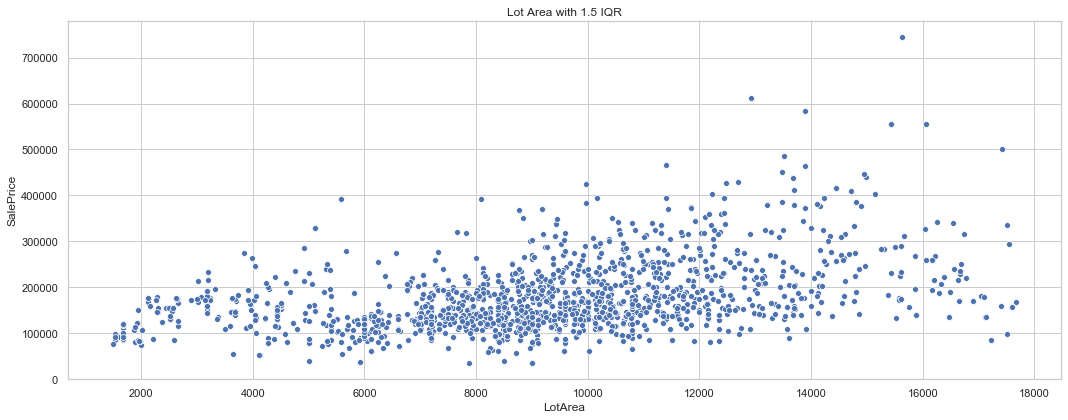

None

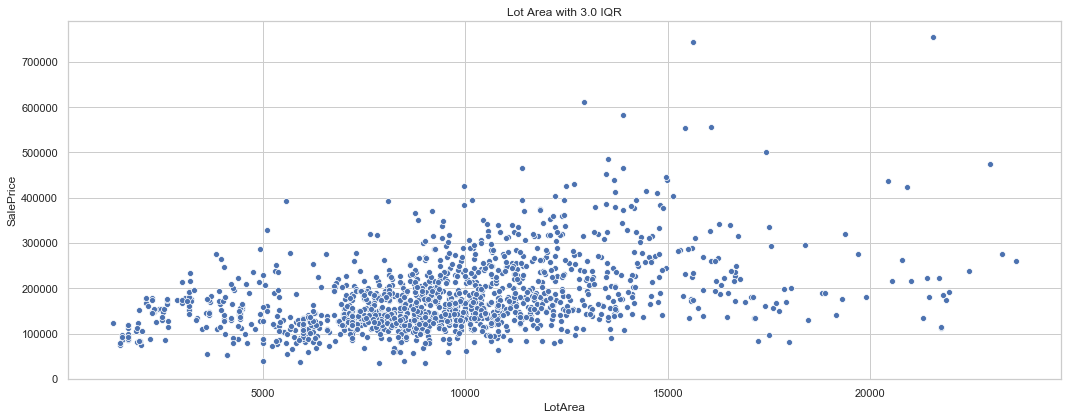

None

In [432]:
# Determine removing outlier impacts on LotArea for 1.5 and 3.0 IQR
lotAreaQ1 = train_set['LotArea'].quantile(0.25)
lotAreaQ3 = train_set['LotArea'].quantile(0.75)
IQR = lotAreaQ3 - lotAreaQ1    #IQR is interquartile range. 

for mlt in ([1.5, 3.0]):
    lotAreafilter = (train_set['LotArea'] >= lotAreaQ1 - mlt * IQR) & \
        (train_set['LotArea'] <= lotAreaQ3 + mlt *IQR)
    lotAreaNoOutliers = train_set.loc[lotAreafilter]
    lotAreaNoOutliers = lotAreaNoOutliers[['Id', 'LotArea', 'SalePrice']]
    
    #plot
    clear_plot()
    fig, axarr = plt.subplots(nrows = 1, ncols = 1, figsize=(15,6))
    sns.scatterplot(x='LotArea', y='SalePrice', data=lotAreaNoOutliers, ax=axarr).\
        set(title='Lot Area with {} IQR'.format(mlt))
    
    fig.tight_layout()
    display(plt.show())

##### Conclusion
LotArea at first appeared to be a good predictor of SalePrice but after futher analyzing by removing outliers with 1.5*IQR and 3.0*IQR it shows to have no correlation and is not a good predictor of SalePrice

### Overall Conclusion for Exploreation #1

The following features that appear to be good predictors of SalePrice. Later we will further examine which of this are good predictors of SalePrice using the correlation score of each feature with the SalePrice

- Fireplaces
- Full Bath
- GarageCars
- OverallQual
- TotRmsAbvGr
- 1stFlrSF (First Floor square feet)
- GrLivArea (Above grade (ground) living area square feet)
- TotalBsmtSF (Total square feet of basement area)
- BsmtQual
- CentralAir
- Electrical
- ExterQual
- FirepaceQu
- GarageFinish
- HeatingQC
- KitchenQual
- PoolQC

### Exploration 2: Look at the distributions using a histogram

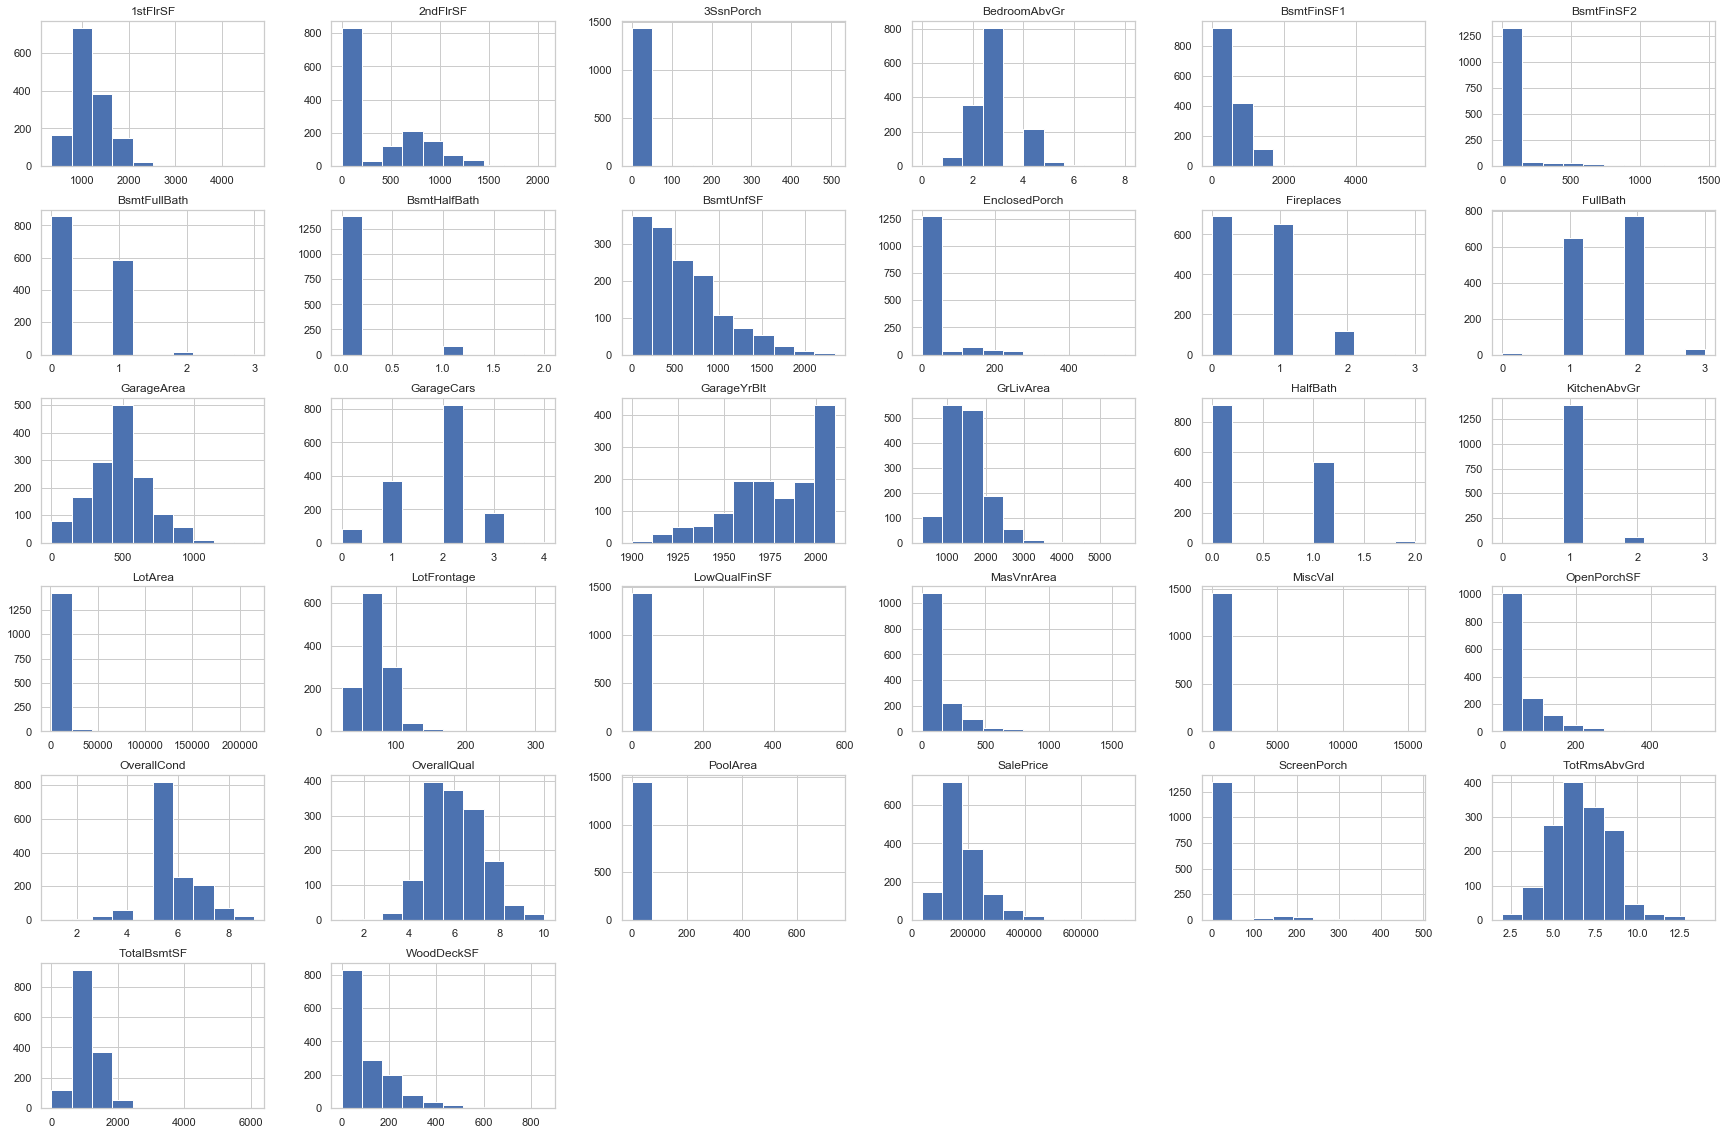

In [408]:
columns = [key for key, value in cols_to_inspect.items() if value in (['both', 'scatter'])]
columns.append('SalePrice')
feature_dist = train_set[columns]
feature_dist.hist(bins = 10, figsize = (30,20))
plt.show()

### Exploration 3: See the distribution of home sales

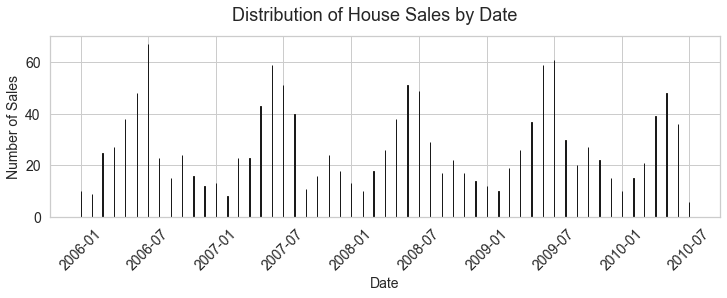

In [414]:
clear_plot()

salesByDate = train_set.groupby('SaleDate').agg({'Id': 'count'}).reset_index()
salesByDate.rename(columns={'Id': 'Count'}, inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(12,4))
axs.bar(salesByDate['SaleDate'], salesByDate['Count'], color = 'orange', edgecolor='k')
fig.suptitle('Distribution of House Sales by Date', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.subplots_adjust(bottom=0.25)
plt.grid(True)
axs.tick_params(axis='x', which='major', labelsize=14, rotation=45)
axs.tick_params(axis='y', which='major', labelsize=14)

plt.show()

#### Conclusion

The home sales in the dataset are between 2006 and 2010 (4 year period). The home prices appear to not be impacted  over the 4 year period as we can see from scatter plot in exploration 1 that shows no correlation. Therefore, the likely outcome is the sale date has no impact on the sale price

## Review research design and modeling methods (10 points)

### Explore if the fields identified in the "Data preparation, exploration, visualization" have good correlation scores with SalePrice

The fields identified are:


#### Identify fields that have an affect on SalePrice

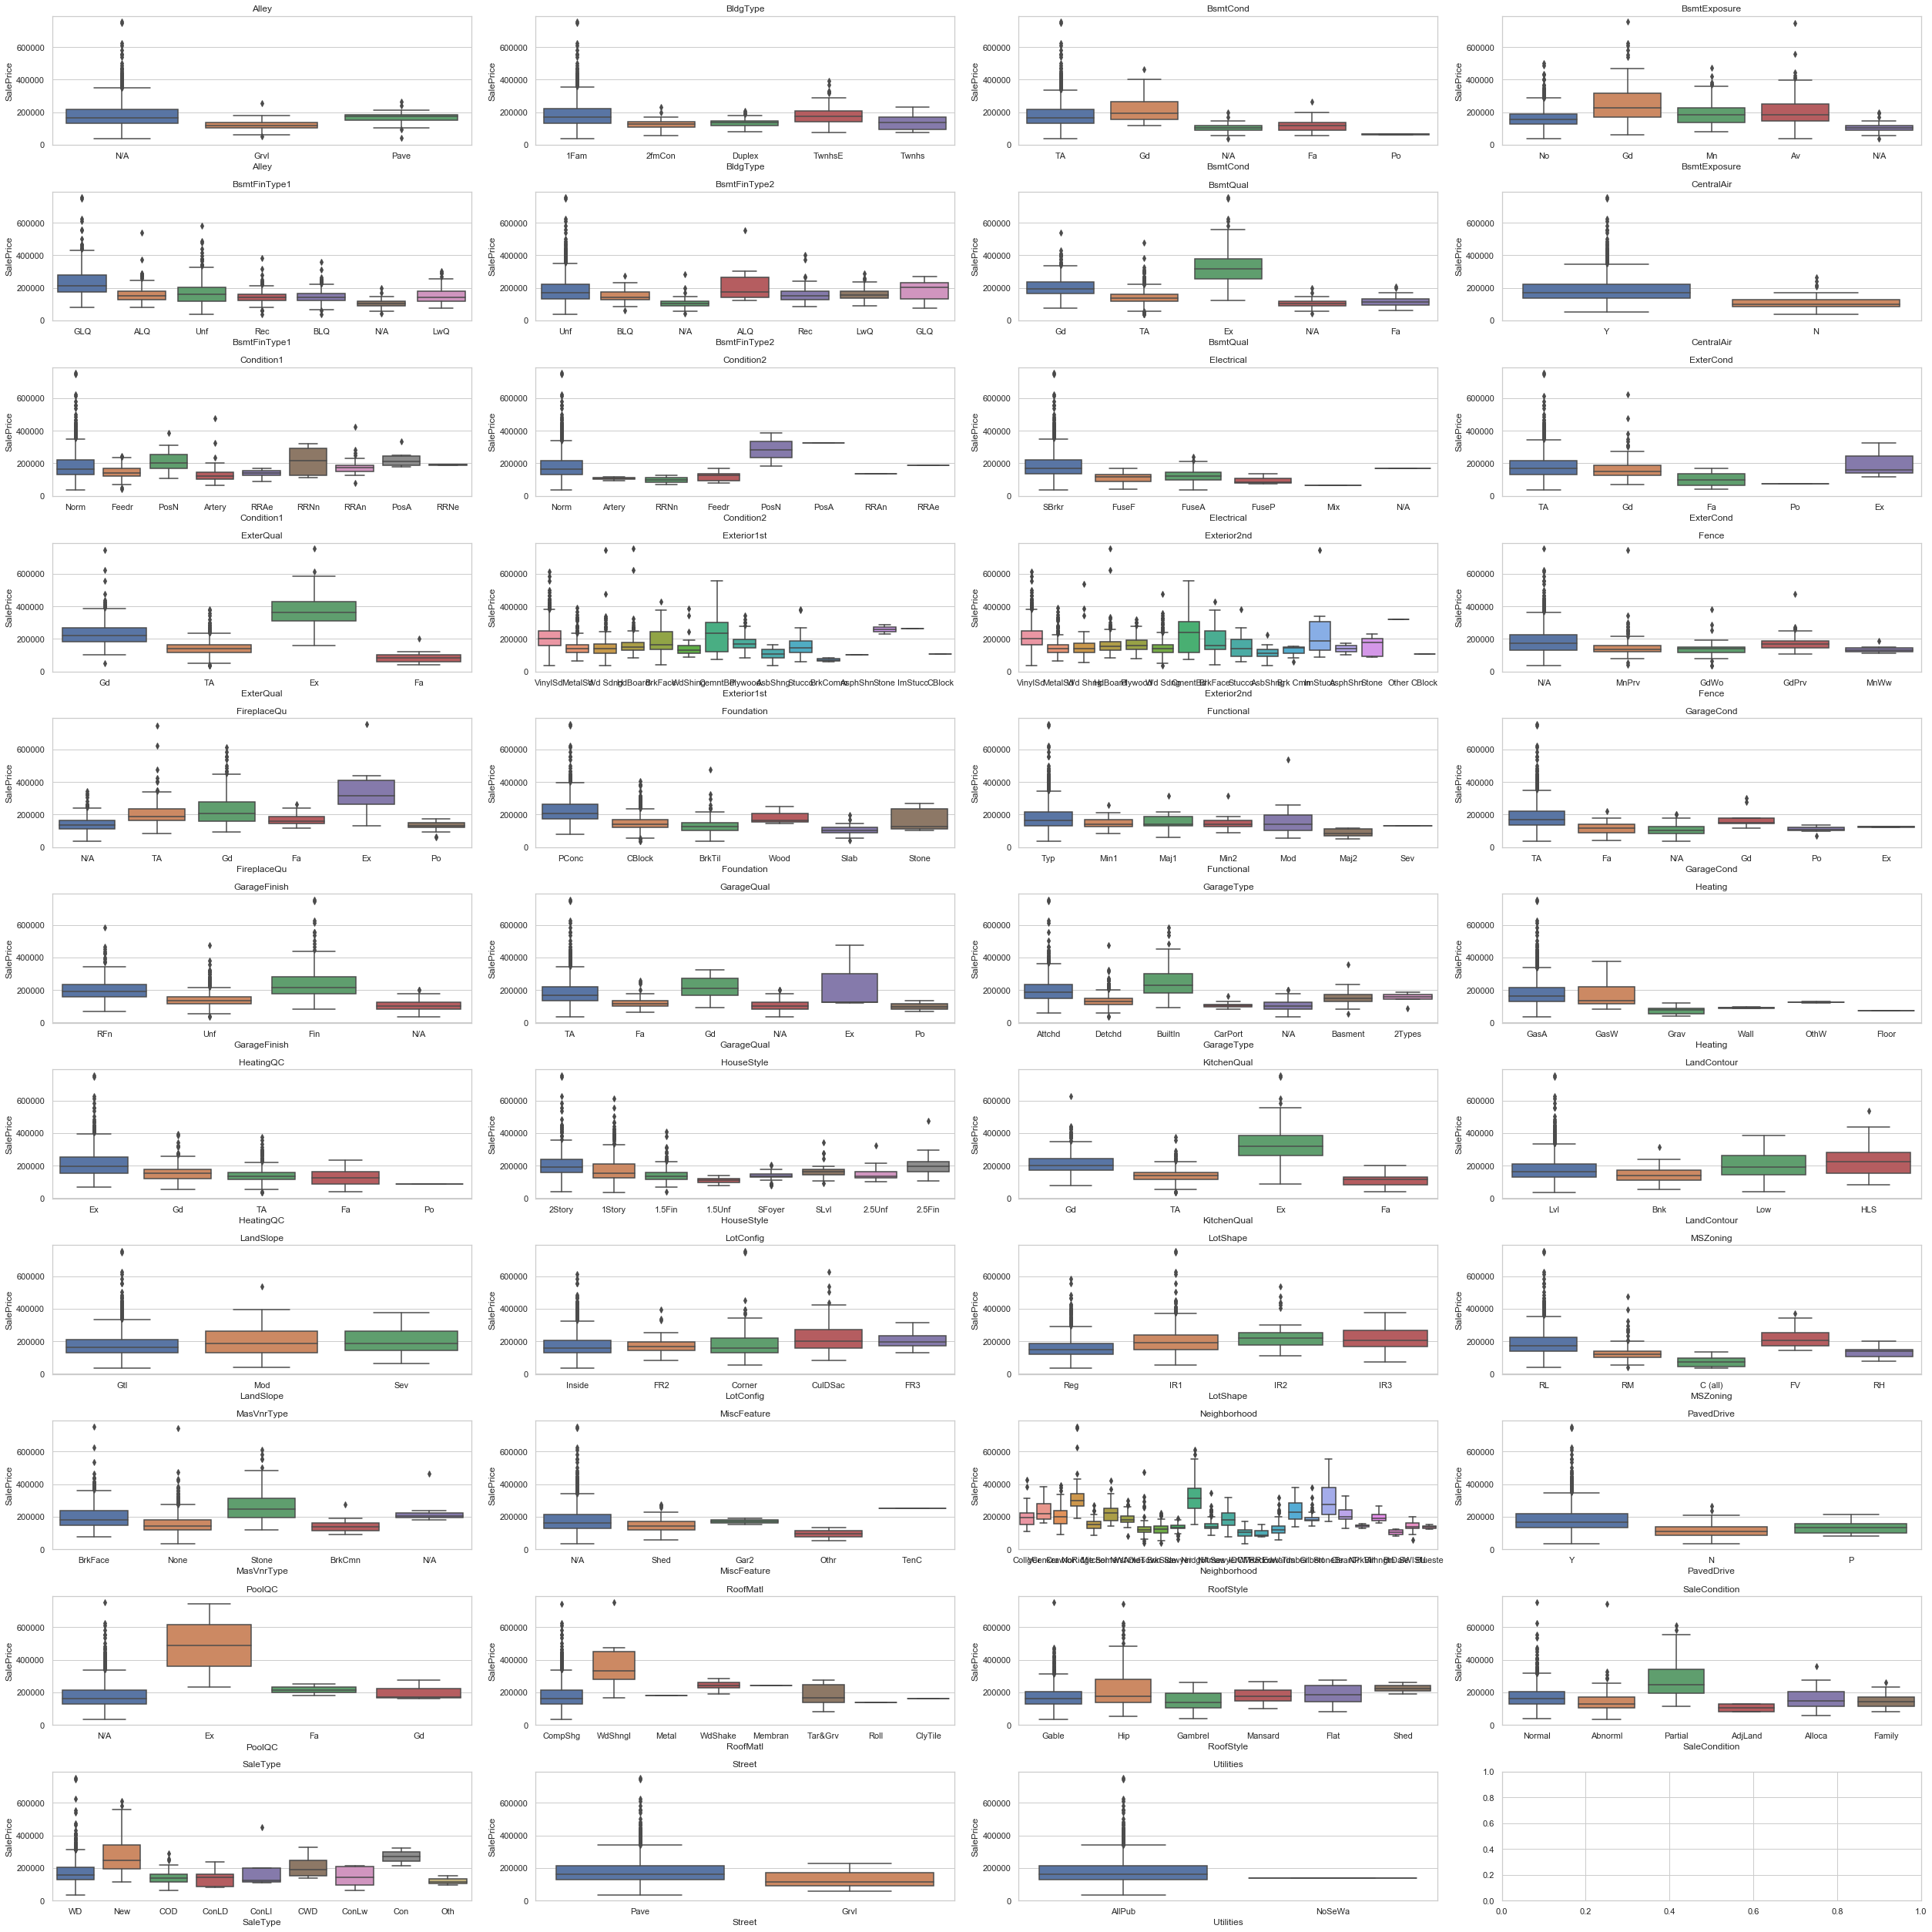

In [246]:
clear_plot()

# get columns that are objects
cols = train_set.select_dtypes(include=['object']).columns.to_list()
cols.sort()
cols.append('SalePrice')
train_set_categorial = train_set[cols]

# configure subplot
f_cols = 4
f_rows = math.ceil((len(cols)-1)/f_cols)
fig, axes = plt.subplots(nrows = f_rows, ncols = f_cols, figsize=(35,35))


i = 0; j = 0; k = 0;
for c in train_set_categorial.columns:
    if c == 'SalePrice':
        pass
    else:
        categorial_plot = train_set_categorial[[c, 'SalePrice']].fillna('N/A')

        sns.boxplot(x=c, y='SalePrice', data=categorial_plot, ax=axes[i,j]).set(title=c)

#        print('\t[{}:{}]'.format(i,j))
        if j == f_cols-1:
            j = 0
            i = i + 1
        else:
            j = j + 1
    
    #k = k + 1
    #if k > 10:
    #    break

fig.tight_layout()
plt.savefig('categorial-data_boxplots.png')
plt.show()

In [259]:
train_set.groupby('OverallCond').agg({'SalePrice': 'mean'})

SalePrice
OverallCond               
1             61000.000000
2            141986.400000
3            101929.400000
4            120438.438596
5            203146.914738
6            153961.591270
7            158145.487805
8            155651.736111
9            216004.545455

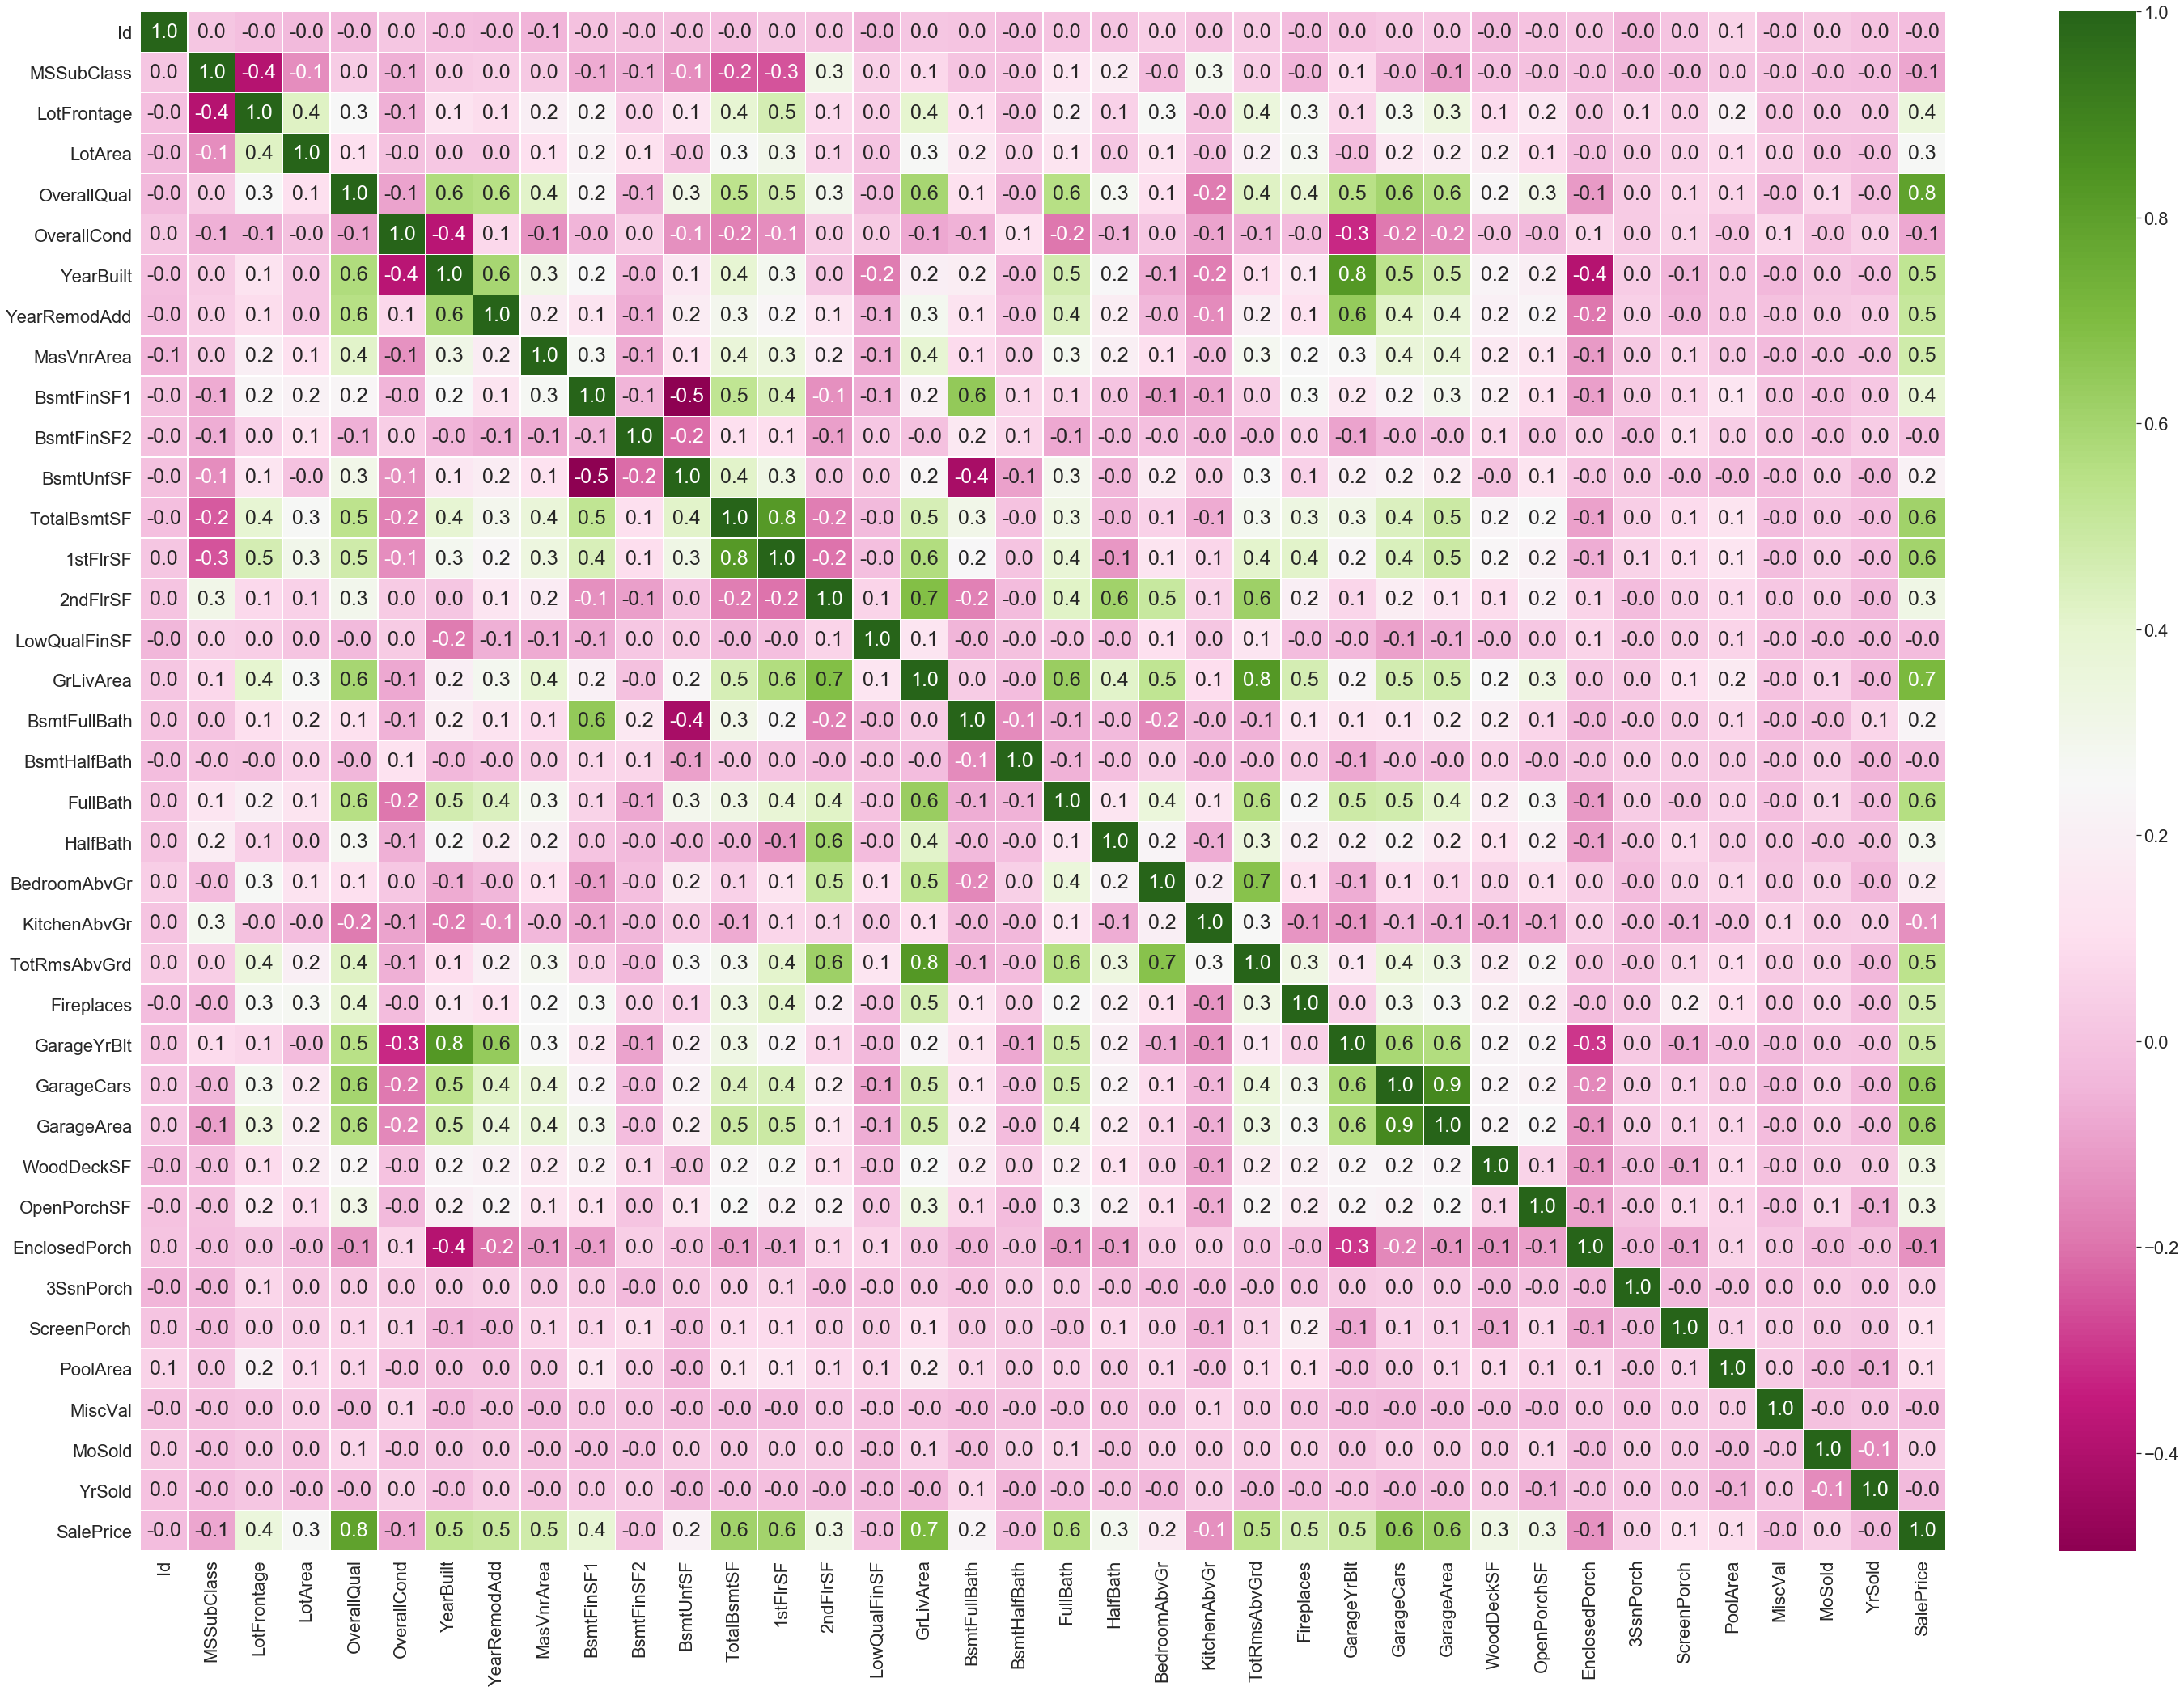

In [253]:
correlation_train = train_set.corr()
sns.set(font_scale=2)
plt.figure(figsize=(50,35))
ax = sns.heatmap(correlation_train, annot=True, annot_kws={'size': 25}, fmt = '.1f', cmap="PiYG", linewidths=.5)

Based on the heatmap of the pairwise correlation of columns it would appear that values greater than 0.3 have an impact on Sale Price

In [68]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()

# identify important features. We will do this by looking at important features with a pairwise correlation value
# great than 0.3
important_features = []
for k, v in corr_dict.items():
    #if(((v > 0) & (v <=1)) | (v < 0)) and k not in (['SalePrice', 'Id']):
    if v >= 0.3  and k not in ['Id']:
        important_features.append(k)

important_features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

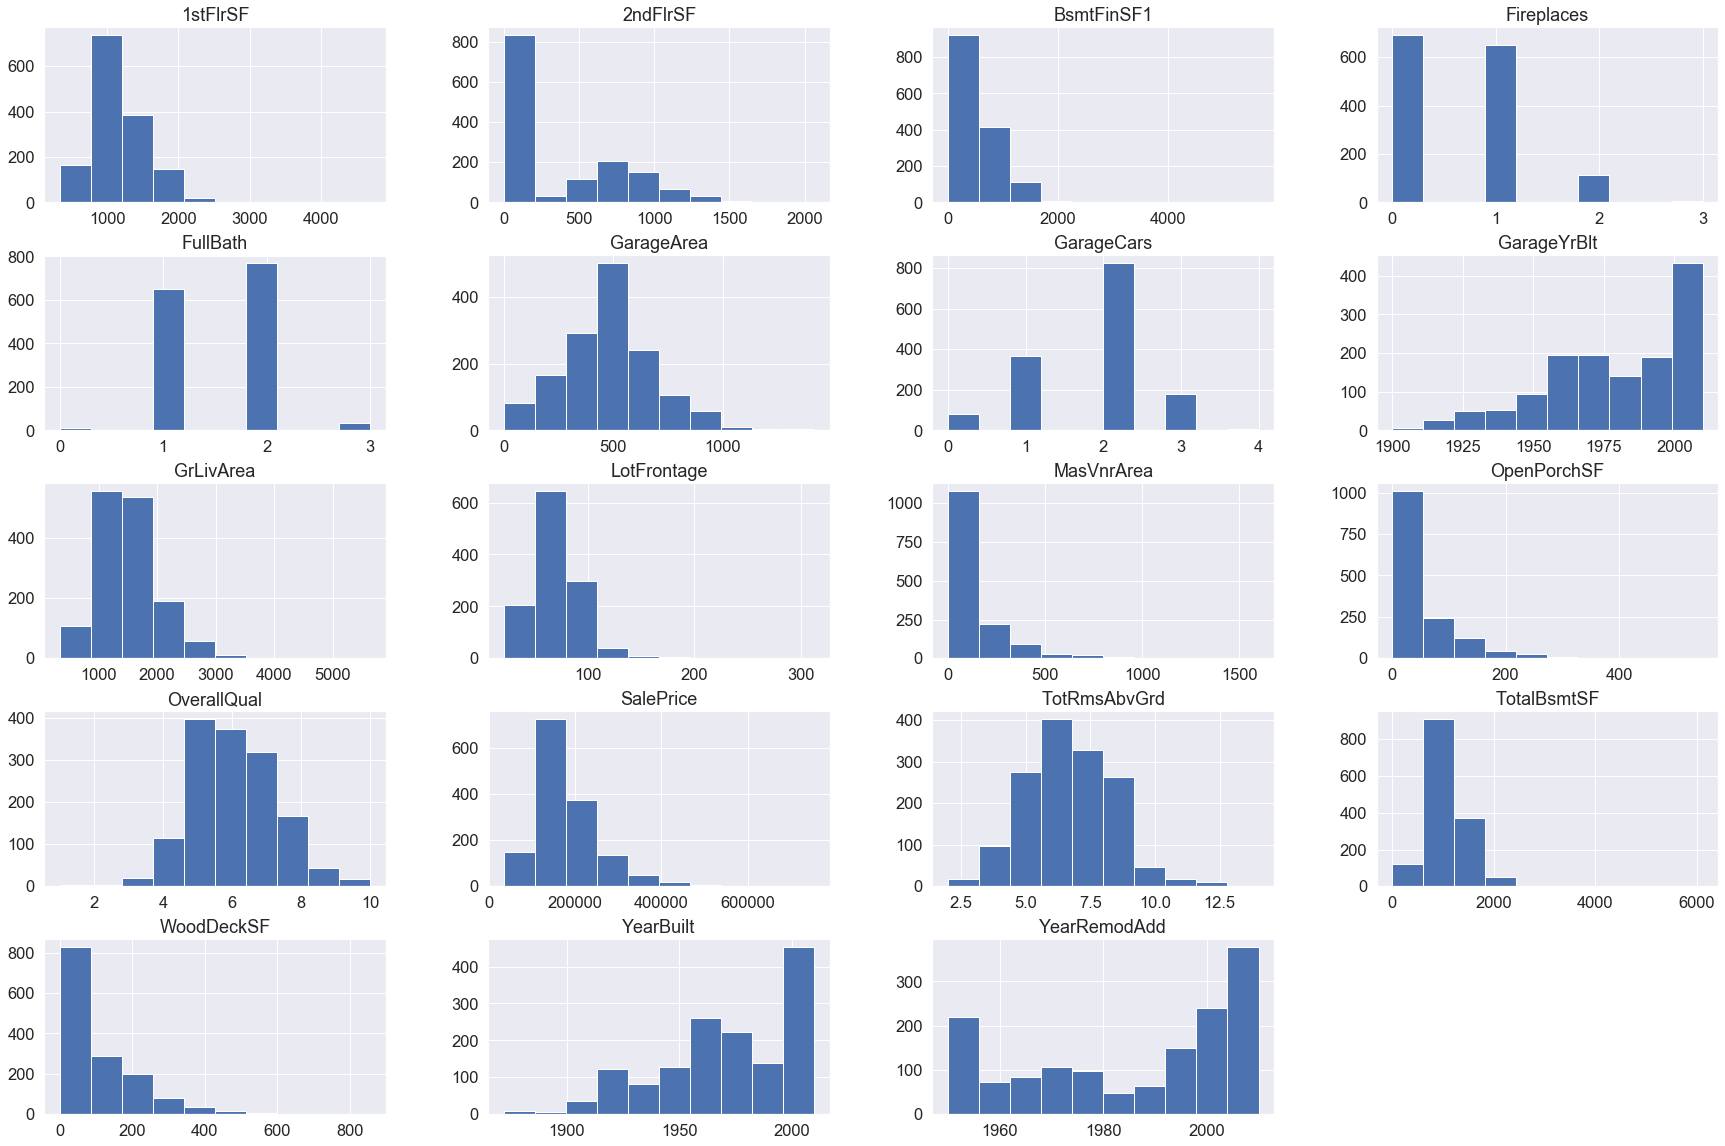

In [111]:
train_set = train_set[important_features]
cols = train_set.iloc[:,1:].columns
cols_len = len(cols)

clear_plot()

train_set.hist(figsize = (30, 20))
plt.show()

In [66]:
train_set = train_set

train_set.loc[train_set['Fireplaces'] == 0, 'FireplaceQu'] = 'Nothing'
train_set.loc[train_set['LotFrontage'].isna(), ['LotFrontage', '1stFlrSF']]

LotFrontage  1stFlrSF
7             NaN      1107
12            NaN       912
14            NaN      1253
16            NaN      1004
24            NaN      1060
...           ...       ...
1429          NaN      1440
1431          NaN       958
1441          NaN       848
1443          NaN       952
1446          NaN      1188

[259 rows x 2 columns]